### ---------------------------------- Busniess objective:- Bulid the model to predict the sales of a store ------------------------------------

## Importing Library...........

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder,OneHotEncoder
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.ensemble import StackingRegressor,RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"
import seaborn as sb
from warnings import filterwarnings
filterwarnings('ignore')
sb.set_theme(style="darkgrid")
sb.set(rc={'figure.facecolor':'skyblue'})

## Dataset Loading........

In [3]:
data1=pd.read_csv("DS3_C6_S1_Regression_StoreSales_Data_Project.csv")
data1.head()

Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.074402   
4           NCD19         8.93          Low Fat         0.064299   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier 1   
3                       1998      Medium               Tier 3   
4                       1987        High               Tier 3   

         Outlet_Type  Item_Outlet_Sales  
0  Supermarket Type1          3735.1380  
1  Supermarket Type2           443.4228  
2  Supermarket Type1          2097.2700  
3      Grocery Store           732.3800  
4  Supermarket Type1           994.7052

In [4]:
data=data1

## Data Exploration

In [5]:
def data_description(data):
    print("shape of dataset---",data.shape)
    print()
    print("size of dataset----",data.size)
    print()
    print("dimension of dataset-----",data.ndim)
    print()
    print(data.columns)
    print()
    print(data.dtypes)
    

In [6]:
data_description(data)

shape of dataset--- (14204, 12)

size of dataset---- 170448

dimension of dataset----- 2

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object


In [7]:
a=data.select_dtypes(exclude="object")
b=data.select_dtypes(include="object")
a.head(2)
b.head(2)
a_lst=list(a.columns)
b_lst=list(b.columns)
print(tabulate({"categorical":b_lst, "numeric":a_lst},headers=["categorical","continuous"]))



Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                       1999   
1         5.92         0.019278   48.2692                       2009   

   Item_Outlet_Sales  
0          3735.1380  
1           443.4228

Item_Identifier Item_Fat_Content    Item_Type Outlet_Identifier Outlet_Size  \
0           FDA15          Low Fat        Dairy            OUT049      Medium   
1           DRC01          Regular  Soft Drinks            OUT018      Medium   

  Outlet_Location_Type        Outlet_Type  
0               Tier 1  Supermarket Type1  
1               Tier 3  Supermarket Type2

categorical           continuous
--------------------  -------------------------
Item_Identifier       Item_Weight
Item_Fat_Content      Item_Visibility
Item_Type             Item_MRP
Outlet_Identifier     Outlet_Establishment_Year
Outlet_Size           Item_Outlet_Sales
Outlet_Location_Type
Outlet_Type


In [8]:
for i in b_lst:
    g=data[i].value_counts()
    print("-------------------------------------------------",i,"----------------------------------------------")
    print(g)
    print("--------------------------------------------------------------------------------------------------------")

------------------------------------------------- Item_Identifier ----------------------------------------------
FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64
--------------------------------------------------------------------------------------------------------
------------------------------------------------- Item_Fat_Content ----------------------------------------------
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64
--------------------------------------------------------------------------------------------------------
------------------------------------------------- Item_Type ----------------------------------------------
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   

In [9]:
data.describe().T

count         mean          std          min  \
Item_Weight                14204.0    12.793380     4.651716     4.555000   
Item_Visibility            14204.0     0.070301     0.048621     0.003575   
Item_MRP                   14204.0   141.004977    62.086938    31.290000   
Outlet_Establishment_Year  14204.0  1997.830681     8.371664  1985.000000   
Item_Outlet_Sales           8523.0  2181.288914  1706.499616    33.290000   

                                   25%          50%          75%           max  
Item_Weight                   8.710000    12.600000    16.750000     21.350000  
Item_Visibility               0.033143     0.062347     0.094037      0.328391  
Item_MRP                     94.012000   142.247000   185.855600    266.888400  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000   2009.000000  
Item_Outlet_Sales           834.247400  1794.331000  3101.296400  13086.964800

## Missing value checking.........

In [10]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [11]:
data.isnull().mean()*100

Item_Identifier               0.000000
Item_Weight                   0.000000
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                   0.000000
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales            39.995776
dtype: float64

##### 40% vlaue is missing in item outlet sales

## Visualization

In [112]:
def info_num(col):
    print(f"the mean of the ={col} is ={data[col].mean()}")
    print(f"the median of the ={col} is ={data[col].median()}")
    null=data[col].isnull().sum()
    if null!=0:
        print(f"the no. of missing value is ={null}")

In [113]:
info_num("Item_Outlet_Sales")

the mean of the =Item_Outlet_Sales is =2181.2889135750365
the median of the =Item_Outlet_Sales is =1794.331
the no. of missing value is =5681


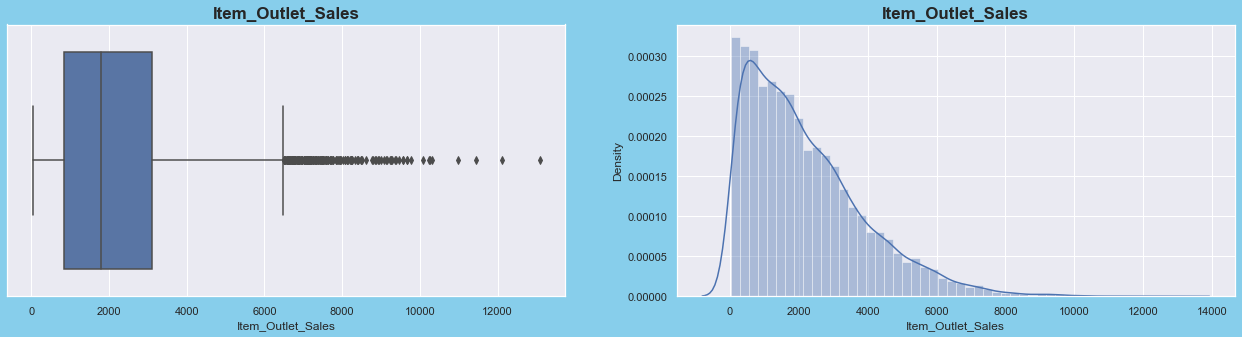

In [12]:
plt.subplots(1,2,figsize=(22,5))

plt.subplot(1,2,1)
sb.boxplot(data["Item_Outlet_Sales"])
plt.title("Item_Outlet_Sales",fontweight="bold",fontsize=17)

plt.subplot(1,2,2)
sb.distplot(data["Item_Outlet_Sales"])
plt.title("Item_Outlet_Sales",fontweight="bold",fontsize=17);

#### -  The mean of the =Item_Outlet_Sales is =2181.2889135750365 
#### -  The sales range between from 33.29 to 13086

In [15]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [16]:
data1=data.copy()

- Outlet_size is ordinal feature,so i apply here ordinal  encoding

In [17]:
outlet_size=OrdinalEncoder(categories=[['Small','Medium','High']]).fit_transform(data[['Outlet_Size']])
outlet_size_encode=pd.DataFrame(outlet_size,columns=['outlet_size_encode'])
outlet_size_encode['Outlet_Size']=data['Outlet_Size']
outlet_size_encode

outlet_size_encode Outlet_Size
0                     1.0      Medium
1                     1.0      Medium
2                     1.0      Medium
3                     1.0      Medium
4                     2.0        High
...                   ...         ...
14199                 0.0       Small
14200                 1.0      Medium
14201                 0.0       Small
14202                 0.0       Small
14203                 0.0       Small

[14204 rows x 2 columns]

In [18]:
## concat the outlet_size_encode column with dataset
data=pd.concat([data,outlet_size_encode['outlet_size_encode']],axis=1)

In [19]:
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'outlet_size_encode'],
      dtype='object')

In [20]:
data.drop(['Item_Identifier','Outlet_Identifier','Outlet_Size'],axis=1,inplace=True)

In [21]:
data.shape
data.columns

(14204, 10)

Index(['Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type',
       'Item_MRP', 'Outlet_Establishment_Year', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'outlet_size_encode'],
      dtype='object')

In [22]:
b_lst=data.select_dtypes(include=object)
b_lst=list(b_lst.columns)
b_lst

['Item_Fat_Content', 'Item_Type', 'Outlet_Location_Type', 'Outlet_Type']

## Encoding - label encoder

In [23]:
labelencoder=preprocessing.LabelEncoder()
for i in b_lst:
    c=i+"_encode"
    data[c]=labelencoder.fit_transform(data[i])

In [24]:
data.dtypes
data.shape
data.head(2)

Item_Weight                    float64
Item_Fat_Content                object
Item_Visibility                float64
Item_Type                       object
Item_MRP                       float64
Outlet_Establishment_Year        int64
Outlet_Location_Type            object
Outlet_Type                     object
Item_Outlet_Sales              float64
outlet_size_encode             float64
Item_Fat_Content_encode          int32
Item_Type_encode                 int32
Outlet_Location_Type_encode      int32
Outlet_Type_encode               int32
dtype: object

(14204, 14)

Item_Weight Item_Fat_Content  Item_Visibility    Item_Type  Item_MRP  \
0         9.30          Low Fat         0.016047        Dairy  249.8092   
1         5.92          Regular         0.019278  Soft Drinks   48.2692   

   Outlet_Establishment_Year Outlet_Location_Type        Outlet_Type  \
0                       1999               Tier 1  Supermarket Type1   
1                       2009               Tier 3  Supermarket Type2   

   Item_Outlet_Sales  outlet_size_encode  Item_Fat_Content_encode  \
0          3735.1380                 1.0                        0   
1           443.4228                 1.0                        1   

   Item_Type_encode  Outlet_Location_Type_encode  Outlet_Type_encode  
0                 4                            0                   1  
1                14                            2                   2

In [25]:
X=data.select_dtypes(exclude="object")

In [26]:
### normalized the data
scalar=StandardScaler()
data_scaled=pd.DataFrame(scalar.fit_transform(X),columns=X.columns)

In [27]:
data_scaled.shape

(14204, 10)

In [28]:
### Filter the data based on the non missing value on dependent variable
data_not_null_norm=data_scaled[data_scaled['Item_Outlet_Sales'].notnull()] 
data_not_null_norm.head(2)
data_not_null_norm.shape
data_not_null_norm.isnull().sum()

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0    -0.751014        -1.115880  1.752511                   0.139681   
1    -1.477653        -1.049426 -1.493696                   1.334228   

   Item_Outlet_Sales  outlet_size_encode  Item_Fat_Content_encode  \
0           0.910601            0.575144                -0.739212   
1          -1.018440            0.575144                 1.352792   

   Item_Type_encode  Outlet_Location_Type_encode  Outlet_Type_encode  
0         -0.766467                    -1.369286           -0.252702  
1          1.606957                     1.091566            1.002766

(8523, 10)

Item_Weight                    0
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
Item_Outlet_Sales              0
outlet_size_encode             0
Item_Fat_Content_encode        0
Item_Type_encode               0
Outlet_Location_Type_encode    0
Outlet_Type_encode             0
dtype: int64

In [29]:
X_not_null_norm=data_not_null_norm.drop(['Item_Outlet_Sales'],axis=1)
y_not_null_norm=data_not_null_norm[['Item_Outlet_Sales']]

In [30]:
### spliting done for non mising records 
x_train1_norm,x_test1_norm,y_train1_norm,y_test1_norm=train_test_split(X_not_null_norm,y_not_null_norm,test_size=0.3,random_state=92)
x_train1_norm.head(1)
y_train1_norm.head(1)
x_train1_norm.shape
y_train1_norm.shape
x_test1_norm.shape
y_test1_norm.shape

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
3388    -0.838082         1.401141  0.354654                   1.095319   

      outlet_size_encode  Item_Fat_Content_encode  Item_Type_encode  \
3388           -0.905347                 1.352792         -0.529124   

      Outlet_Location_Type_encode  Outlet_Type_encode  
3388                     -0.13886           -0.252702

Item_Outlet_Sales
3388          -0.617337

(5966, 9)

(5966, 1)

(2557, 9)

(2557, 1)

In [31]:
import math
math.sqrt(len(x_train1_norm))

77.23988606931007

### Deciding the number of neighbors(k) for KNN imputer

 - For the imputation of missing value in the dependent variable it's decided to use KNN imputer method
 - In KNN imputer ,we have to decide the number of neighbors 
 - for deciding the no. of neighbors 2 approach are used

In [32]:
k_lst=list(range(1,84))


### 1st approach - finding optimal value of k i.e. number of neighbors using KNN Regressor

- K value is taken from 1 to 83
- model is trained on the non missing dataset for each k value 
- For which k the error is low,that should be the optimal k value

In [34]:
mse_lst=[]
rmse_lst=[]
mae_lst=[]
r2_train_lst=[]
r2_test_lst=[]
c=0
for i in  k_lst:
    knn=KNeighborsRegressor(n_neighbors=int(i))
    model_knn=knn.fit(x_train1_norm,y_train1_norm)
    y_predict=model_knn.predict(x_test1_norm)
    r2_train=model_knn.score(x_train1_norm,y_train1_norm)
   ## model_knn.fit(x_test1_norm,y_test1_norm)
    r2_test=model_knn.score(x_test1_norm,y_test1_norm)
    mse=mean_squared_error(y_test1_norm,y_predict)
    rmse=mean_squared_error(y_test1_norm,y_predict,squared=False)
    mae=mean_absolute_error(y_test1_norm,y_predict)
    r2_train_lst.append(r2_train)
    r2_test_lst.append(r2_test)
    mse_lst.append(mse)
    rmse_lst.append(rmse)
    mae_lst.append(mae)
    c=c+1
    print(c,end="")

1234567891011121314151617181920212223242526272829303132333435363738394041424344454647484950515253545556575859606162636465666768697071727374757677787980818283

In [35]:
dic={"kvalue":k_lst,'R2_train':r2_train_lst,"r2_test":r2_test_lst,'MSE':mse_lst,"RMSE":rmse_lst,"MAE":mae}

In [36]:
K_performance=pd.DataFrame(dic,index=k_lst)
K_performance=K_performance.sort_values('MSE')
K_performance

kvalue  R2_train   r2_test       MSE      RMSE       MAE
24      24  0.601870  0.569439  0.437806  0.661669  0.500392
26      26  0.599749  0.569386  0.437860  0.661710  0.500392
25      25  0.600969  0.569266  0.437982  0.661802  0.500392
19      19  0.607918  0.569208  0.438041  0.661846  0.500392
23      23  0.603208  0.569188  0.438061  0.661862  0.500392
..     ...       ...       ...       ...       ...       ...
5        5  0.679876  0.512665  0.495535  0.703942  0.500392
4        4  0.698200  0.489267  0.519327  0.720643  0.500392
3        3  0.734793  0.463961  0.545059  0.738281  0.500392
2        2  0.795485  0.383619  0.626752  0.791677  0.500392
1        1  1.000000  0.188188  0.825472  0.908555  0.500392

[83 rows x 6 columns]

In [37]:
K_performance.sort_values('MSE',ascending=False).head(7)

kvalue  R2_train   r2_test       MSE      RMSE       MAE
1       1  1.000000  0.188188  0.825472  0.908555  0.500392
2       2  0.795485  0.383619  0.626752  0.791677  0.500392
3       3  0.734793  0.463961  0.545059  0.738281  0.500392
4       4  0.698200  0.489267  0.519327  0.720643  0.500392
5       5  0.679876  0.512665  0.495535  0.703942  0.500392
6       6  0.664399  0.526862  0.481099  0.693613  0.500392
7       7  0.653288  0.544004  0.463668  0.680932  0.500392

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


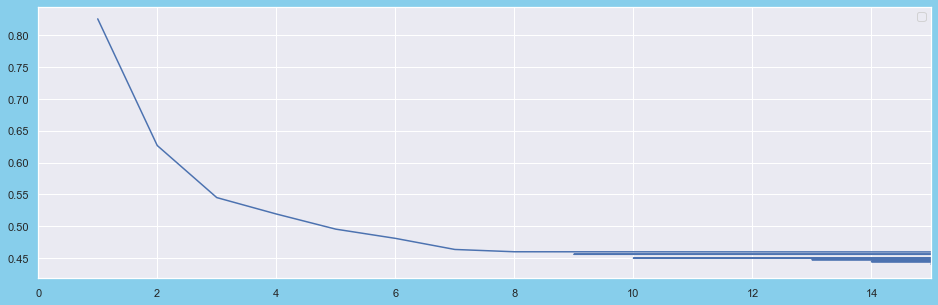

In [39]:
plt.figure(figsize=(16,5))
plt.plot(K_performance["MSE"])
plt.xlim([0,15])
plt.legend();

### WE can take k = 3  

---------------------------------------------------------------------

In [40]:
X1=data_scaled.copy()
X1.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'outlet_size_encode',
       'Item_Fat_Content_encode', 'Item_Type_encode',
       'Outlet_Location_Type_encode', 'Outlet_Type_encode'],
      dtype='object')

In [41]:
##X1=data_scaled.drop(['Item_Identifier_encode','Outlet_Identifier_encode'],axis=1)
X1.columns
X1.shape

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'outlet_size_encode',
       'Item_Fat_Content_encode', 'Item_Type_encode',
       'Outlet_Location_Type_encode', 'Outlet_Type_encode'],
      dtype='object')

(14204, 10)

In [168]:
##k_lst=list(range(1,18))

## 2nd approach - finding optial k value with linear regreesion

- k value is taken from 1 to 83
- Impute the non missing value using KNN imputer for each k 
- After imputation,  model is trained using Linear Regreesion algorithm 
- For which k the error is observed less,we can decide that should be the optimal k value

In [43]:
mse_lst=[]
rmse_lst=[]
mae_lst=[]
r2_train_lst=[]
r2_test_lst=[]
c=0
for k in k_lst:
    knn=KNNImputer(n_neighbors=k,weights='distance')
    x_imputer=pd.DataFrame(knn.fit_transform(X1),columns=X1.columns)
    X2=x_imputer.drop(['Item_Outlet_Sales'],axis=1)
    Y2=x_imputer[['Item_Outlet_Sales']]
    x_train1,x_test1,y_train1,y_test1=train_test_split(X2,Y2,test_size=0.3,random_state=92)
    lr=LinearRegression()
    lr.fit(x_train1,y_train1)
    y_predict=lr.predict(x_test1)
    r2_train=lr.score(x_train1,y_train1)
    ##lr.fit(x_test1,y_test1)
    r2_test=lr.score(x_test1,y_test1)
    mse=mean_squared_error(y_test1,y_predict)
    rmse=mean_squared_error(y_test1,y_predict,squared=False)
    mae=mean_absolute_error(y_test1,y_predict)
    r2_train_lst.append(r2_train)
    r2_test_lst.append(r2_test)
    mse_lst.append(mse)
    rmse_lst.append(rmse)
    mae_lst.append(mae)
    c=c+1
    print(c,end=" ")

LinearRegression()

1 

LinearRegression()

2 

LinearRegression()

3 

LinearRegression()

4 

LinearRegression()

5 

LinearRegression()

6 

LinearRegression()

7 

LinearRegression()

8 

LinearRegression()

9 

LinearRegression()

10 

LinearRegression()

11 

LinearRegression()

12 

LinearRegression()

13 

LinearRegression()

14 

LinearRegression()

15 

LinearRegression()

16 

LinearRegression()

17 

LinearRegression()

18 

LinearRegression()

19 

LinearRegression()

20 

LinearRegression()

21 

LinearRegression()

22 

LinearRegression()

23 

LinearRegression()

24 

LinearRegression()

25 

LinearRegression()

26 

LinearRegression()

27 

LinearRegression()

28 

LinearRegression()

29 

LinearRegression()

30 

LinearRegression()

31 

LinearRegression()

32 

LinearRegression()

33 

LinearRegression()

34 

LinearRegression()

35 

LinearRegression()

36 

LinearRegression()

37 

LinearRegression()

38 

LinearRegression()

39 

LinearRegression()

40 

LinearRegression()

41 

LinearRegression()

42 

LinearRegression()

43 

LinearRegression()

44 

LinearRegression()

45 

LinearRegression()

46 

LinearRegression()

47 

LinearRegression()

48 

LinearRegression()

49 

LinearRegression()

50 

LinearRegression()

51 

LinearRegression()

52 

LinearRegression()

53 

LinearRegression()

54 

LinearRegression()

55 

LinearRegression()

56 

LinearRegression()

57 

LinearRegression()

58 

LinearRegression()

59 

LinearRegression()

60 

LinearRegression()

61 

LinearRegression()

62 

LinearRegression()

63 

LinearRegression()

64 

LinearRegression()

65 

LinearRegression()

66 

LinearRegression()

67 

LinearRegression()

68 

LinearRegression()

69 

LinearRegression()

70 

LinearRegression()

71 

LinearRegression()

72 

LinearRegression()

73 

LinearRegression()

74 

LinearRegression()

75 

LinearRegression()

76 

LinearRegression()

77 

LinearRegression()

78 

LinearRegression()

79 

LinearRegression()

80 

LinearRegression()

81 

LinearRegression()

82 

LinearRegression()

83 

In [44]:
dic={"kvalue":k_lst,'R2_train':r2_train_lst,"r2_test":r2_test_lst,'MSE':mse_lst,"RMSE":rmse_lst,"MAE":mae}

In [45]:
K_performance2=pd.DataFrame(dic,index=k_lst)
## sort the performance by Mse value
K_performance2=K_performance2.sort_values('MSE')    
K_performance2

kvalue  R2_train   r2_test       MSE      RMSE       MAE
83      83  0.563763  0.565213  0.344999  0.587366  0.412647
82      82  0.563868  0.565317  0.345086  0.587440  0.412647
81      81  0.564032  0.565454  0.345232  0.587564  0.412647
80      80  0.564182  0.565683  0.345337  0.587654  0.412647
79      79  0.564289  0.565857  0.345429  0.587732  0.412647
..     ...       ...       ...       ...       ...       ...
5        5  0.563958  0.566104  0.383467  0.619247  0.412647
4        4  0.558232  0.560383  0.394228  0.627876  0.412647
3        3  0.550284  0.552211  0.406254  0.637381  0.412647
2        2  0.536157  0.536365  0.437551  0.661476  0.412647
1        1  0.498619  0.492661  0.510492  0.714487  0.412647

[83 rows x 6 columns]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


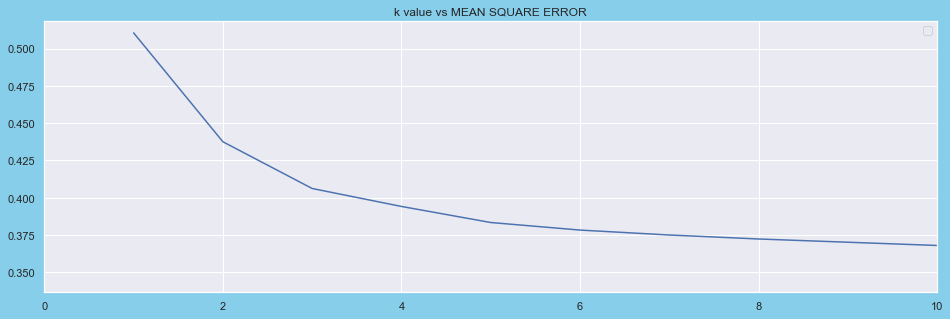

In [46]:
plt.figure(figsize=(16,5))
plt.plot(K_performance2["MSE"])
plt.title("k value vs MEAN SQUARE ERROR")
plt.xlim([0,10])
plt.legend();

#### optimal value of k is 3

### KNN Imputer

In [47]:
knn=KNNImputer(n_neighbors=3,weights='distance')
x_imputer=pd.DataFrame(knn.fit_transform(X1),columns=X1.columns)
x_imputer.head(2)
x_imputer.isnull().sum()
x_imputer.shape

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0    -0.751014        -1.115880  1.752511                   0.139681   
1    -1.477653        -1.049426 -1.493696                   1.334228   

   Item_Outlet_Sales  outlet_size_encode  Item_Fat_Content_encode  \
0           0.910601            0.575144                -0.739212   
1          -1.018440            0.575144                 1.352792   

   Item_Type_encode  Outlet_Location_Type_encode  Outlet_Type_encode  
0         -0.766467                    -1.369286           -0.252702  
1          1.606957                     1.091566            1.002766

Item_Weight                    0
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
Item_Outlet_Sales              0
outlet_size_encode             0
Item_Fat_Content_encode        0
Item_Type_encode               0
Outlet_Location_Type_encode    0
Outlet_Type_encode             0
dtype: int64

(14204, 10)

In [48]:
e=data.select_dtypes(exclude=object)
e.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'outlet_size_encode',
       'Item_Fat_Content_encode', 'Item_Type_encode',
       'Outlet_Location_Type_encode', 'Outlet_Type_encode'],
      dtype='object')

### Denormalized

In [50]:
scalar=StandardScaler()
obj = scalar.fit(e)
x_scaledback=obj.inverse_transform(x_imputer)
imputed_data=pd.DataFrame(x_scaledback,columns=x_imputer.columns)
imputed_data.tail()
imputed_data.shape

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
14199         10.5         0.013496  141.3154                     1997.0   
14200          7.6         0.142991  169.1448                     2009.0   
14201         10.0         0.073529  118.7440                     2002.0   
14202         15.3         0.064709  214.6218                     2007.0   
14203          9.5         0.104720   79.7960                     2002.0   

       Item_Outlet_Sales  outlet_size_encode  Item_Fat_Content_encode  \
14199        1228.027533                 0.0                      1.0   
14200        3883.954147                 1.0                      1.0   
14201        1422.172210                 0.0                      0.0   
14202        4872.891700                 0.0                      1.0   
14203        1711.350713                 0.0                      1.0   

       Item_Type_encode  Outlet_Location_Type_encode  Outlet_Type_encode  
14199              13.0                          0.0                 1.0  
14200              15.0                          2.0                 2.0  
14201               8.0                          1.0                 1.0  
14202               3.0                          1.0                 1.0  
14203               3.0                          1.0                 1.0

(14204, 10)

In [51]:
imputed_data.isnull().sum()

Item_Weight                    0
Item_Visibility                0
Item_MRP                       0
Outlet_Establishment_Year      0
Item_Outlet_Sales              0
outlet_size_encode             0
Item_Fat_Content_encode        0
Item_Type_encode               0
Outlet_Location_Type_encode    0
Outlet_Type_encode             0
dtype: int64

In [52]:
data1.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [53]:
b_lst=list(data1.select_dtypes(include=object).columns)

### Data is denormalized and having no missing value

- Adding 2 more column for sold item quantity and current age of outlet for EDA purpose

In [54]:
data2=pd.concat([imputed_data[a_lst],data1[b_lst]],axis=1)
data2["No_of_item_sell"]=data2["Item_Outlet_Sales"]/data2["Item_MRP"]
data2['No_of_year']=abs(2022-data2["Outlet_Establishment_Year"])
data2.head(2)

Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                     1999.0   
1         5.92         0.019278   48.2692                     2009.0   

   Item_Outlet_Sales Item_Identifier Item_Fat_Content    Item_Type  \
0          3735.1380           FDA15          Low Fat        Dairy   
1           443.4228           DRC01          Regular  Soft Drinks   

  Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  \
0            OUT049      Medium               Tier 1  Supermarket Type1   
1            OUT018      Medium               Tier 3  Supermarket Type2   

   No_of_item_sell  No_of_year  
0        14.951963        23.0  
1         9.186454        13.0

In [55]:
final_data=data2

In [56]:
data_description(final_data)

shape of dataset--- (14204, 14)

size of dataset---- 198856

dimension of dataset----- 2

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'No_of_item_sell', 'No_of_year'],
      dtype='object')

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year    float64
Item_Outlet_Sales            float64
Item_Identifier               object
Item_Fat_Content              object
Item_Type                     object
Outlet_Identifier             object
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
No_of_item_sell              float64
No_of_year                   float64
dtype: object


In [57]:
final_data.isnull().mean()*100

Item_Weight                  0.0
Item_Visibility              0.0
Item_MRP                     0.0
Outlet_Establishment_Year    0.0
Item_Outlet_Sales            0.0
Item_Identifier              0.0
Item_Fat_Content             0.0
Item_Type                    0.0
Outlet_Identifier            0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
No_of_item_sell              0.0
No_of_year                   0.0
dtype: float64

## Compare the outlet sales before and after the imputation

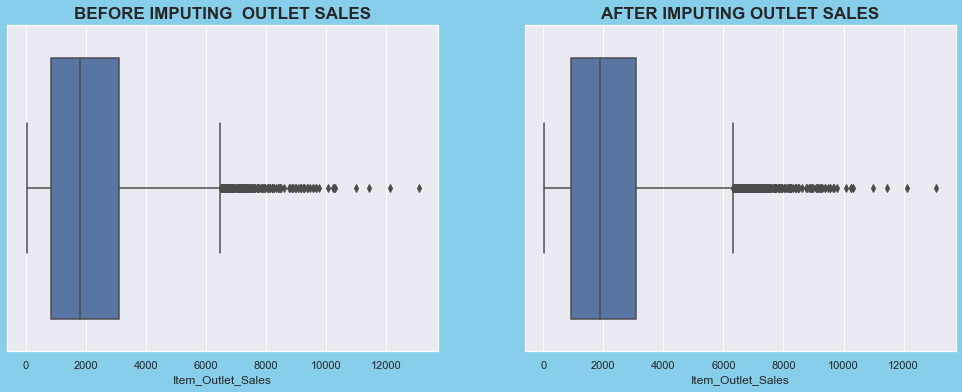

In [58]:
fig,ax=plt.subplots(1,2,figsize=(17,6))

plt.subplot(1,2,1)
sb.boxplot(data1["Item_Outlet_Sales"],ax=ax[0])
plt.title("BEFORE IMPUTING  OUTLET SALES",fontweight="bold",fontsize=17)

plt.subplot(1,2,2)
sb.boxplot(final_data["Item_Outlet_Sales"],ax=ax[1])
plt.title("AFTER IMPUTING OUTLET SALES",fontweight="bold",fontsize=17)
plt.show();

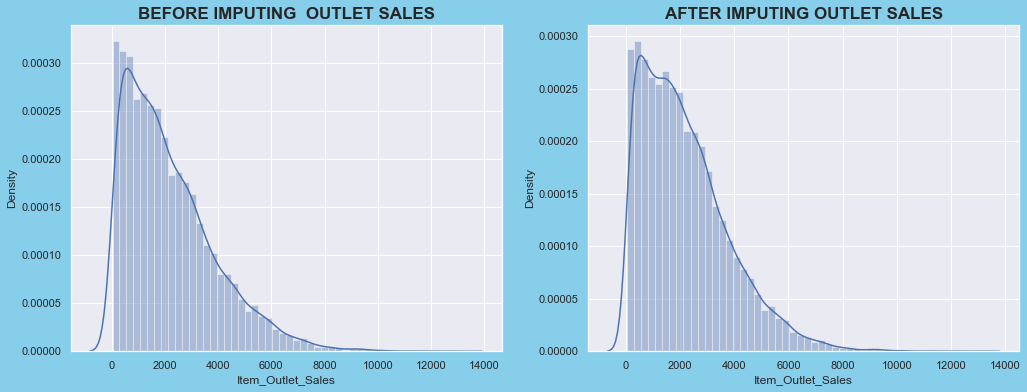

In [59]:
fig,ax=plt.subplots(1,2,figsize=(17,6))

plt.subplot(1,2,1)
sb.distplot(data1["Item_Outlet_Sales"],ax=ax[0])
plt.title("BEFORE IMPUTING  OUTLET SALES",fontweight="bold",fontsize=17)

plt.subplot(1,2,2)
sb.distplot(final_data["Item_Outlet_Sales"],ax=ax[1])
plt.title("AFTER IMPUTING OUTLET SALES",fontweight="bold",fontsize=17)
plt.show();

In [60]:
print("-----------------------------------------Before the data imputation-----------------------------------------------")
data1["Item_Outlet_Sales"].describe()
print("-----------------------------------------After the data imputation-----------------------------------------------")
final_data["Item_Outlet_Sales"].describe()
print("-------------------------------------------------------------------------------------------------------------------")

-----------------------------------------Before the data imputation-----------------------------------------------


count     8523.000000
mean      2181.288914
std       1706.499616
min         33.290000
25%        834.247400
50%       1794.331000
75%       3101.296400
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

-----------------------------------------After the data imputation-----------------------------------------------


count    14204.000000
mean      2184.666884
std       1609.686025
min         33.290000
25%        916.140800
50%       1883.674570
75%       3079.990800
max      13086.964800
Name: Item_Outlet_Sales, dtype: float64

-------------------------------------------------------------------------------------------------------------------


#### after comparing the sales statistics before imputation and after imputation it can clearly understood that the sales data is not much changed.So we can proceed with this data for further analysis

In [61]:
d=['Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Establishment_Year']

### Univariant analysis for Numerical features

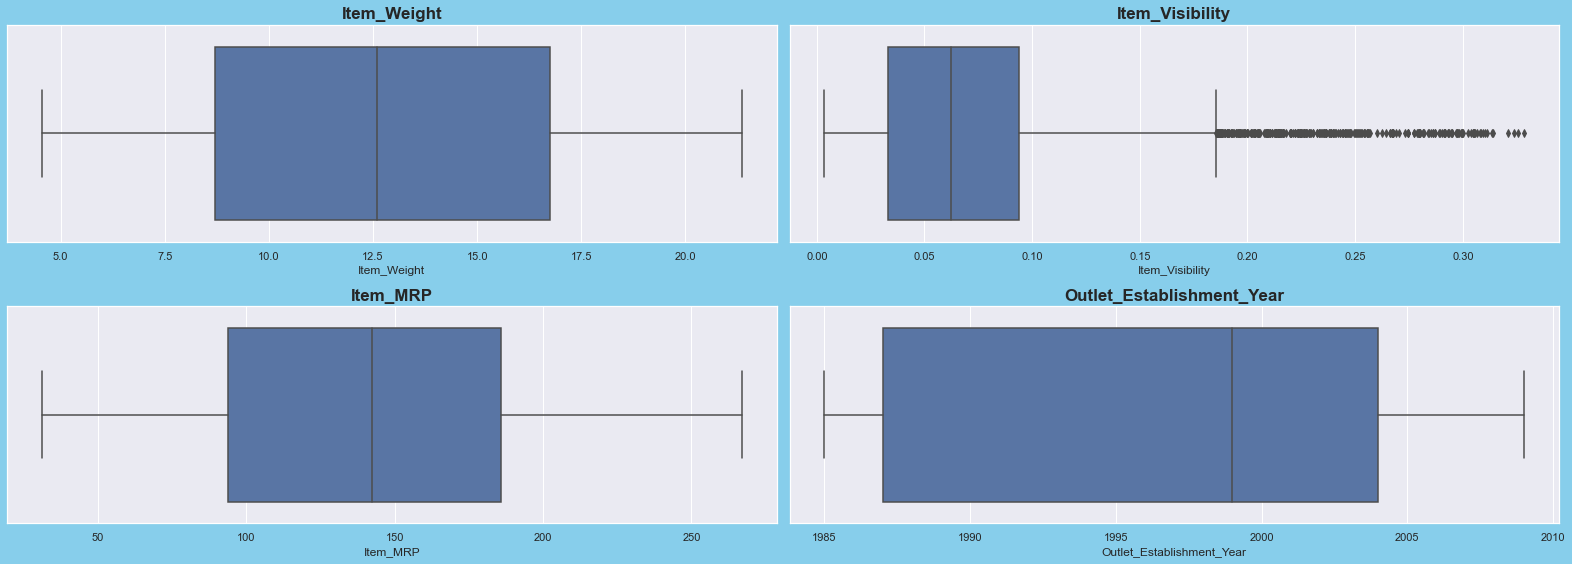

In [62]:
t=1
plt.figure(figsize=(22,8))
for i in d:
    plt.subplot(2,2,t)
    sb.boxplot(x=final_data[i])
    plt.title(i,fontweight="bold",fontsize=17)
    t=t+1
    plt.tight_layout()
plt.show()  ;

### we can observed that Item visibility has outliers

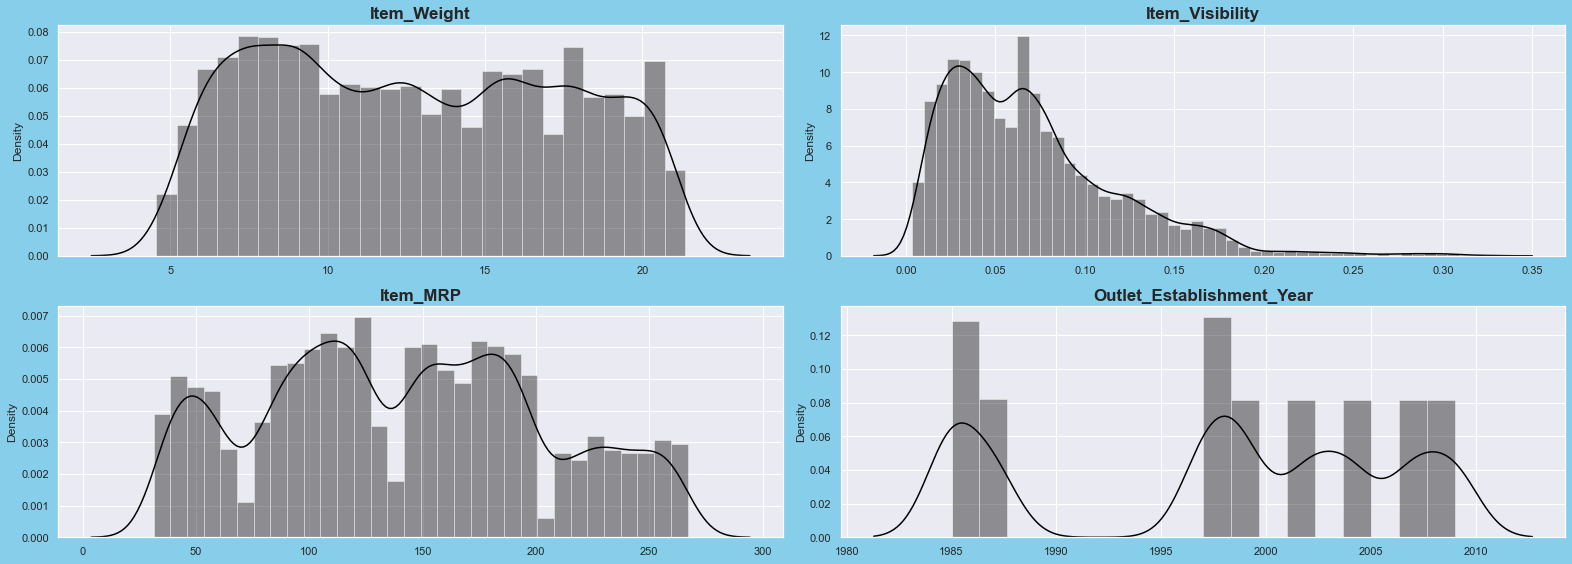

In [63]:
t=1
plt.figure(figsize=(22,8))
for i in d:
    plt.subplot(2,2,t)
    sb.distplot(x=final_data[i],color="black")
    plt.title(i,fontweight="bold",fontsize=17)
    t=t+1
    plt.tight_layout()
plt.show();  

In [64]:
final_data[['Item_Weight','Item_Visibility','Item_MRP', 'Outlet_Establishment_Year']].describe().T

count         mean        std          min  \
Item_Weight                14204.0    12.793380   4.651716     4.555000   
Item_Visibility            14204.0     0.070301   0.048621     0.003575   
Item_MRP                   14204.0   141.004977  62.086938    31.290000   
Outlet_Establishment_Year  14204.0  1997.830681   8.371664  1985.000000   

                                   25%          50%          75%          max  
Item_Weight                   8.710000    12.600000    16.750000    21.350000  
Item_Visibility               0.033143     0.062347     0.094037     0.328391  
Item_MRP                     94.012000   142.247000   185.855600   266.888400  
Outlet_Establishment_Year  1987.000000  1999.000000  2004.000000  2009.000000

- also we observed no numerical data is normally distributed

## Univariant analysis for categorical features

In [65]:
e=['Item_Fat_Content','Outlet_Size','Outlet_Location_Type', 'Outlet_Type']

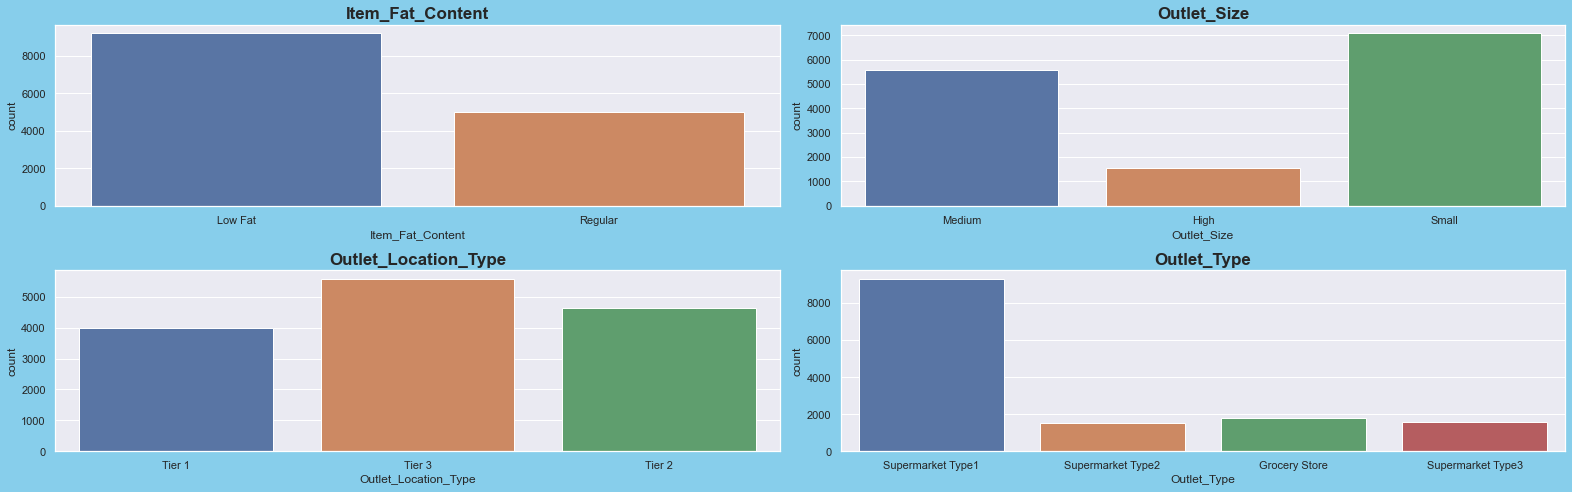

In [66]:
t=1
plt.figure(figsize=(22,7))
for i in e:
    plt.subplot(2,2,t)
    sb.countplot(x=final_data[i])
    plt.title(i,fontweight="bold",fontsize=17)
    t=t+1
    plt.tight_layout()
plt.show();

- the items are mostly less fat content
- Mostly size of the stores are small
- Mostly stores are located in tier3 area
- mostly outlet are supermarket type1

In [67]:
final_data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'No_of_item_sell', 'No_of_year'],
      dtype='object')

## Bivariant Analysis

In [68]:
def groupby_bi_num(colwise,col):
    return(final_data.groupby([colwise]).agg({col:['mean','median']}))
    

#### => How outlet age is effectting the sales

In [69]:
outletage=groupby_bi_num('No_of_year',"Item_Outlet_Sales")
outletage

Item_Outlet_Sales             
                        mean       median
No_of_year                               
13.0             1985.839101  1708.082832
15.0             2377.911576  2152.768773
18.0             2376.014921  2093.941000
20.0             2227.142047  1948.130800
23.0             2369.214462  2078.946912
24.0              340.953405   271.163327
25.0             2262.380119  2013.712100
35.0             2292.258279  2085.951400
37.0             2503.941771  2057.987800

<AxesSubplot:xlabel='No_of_year'>

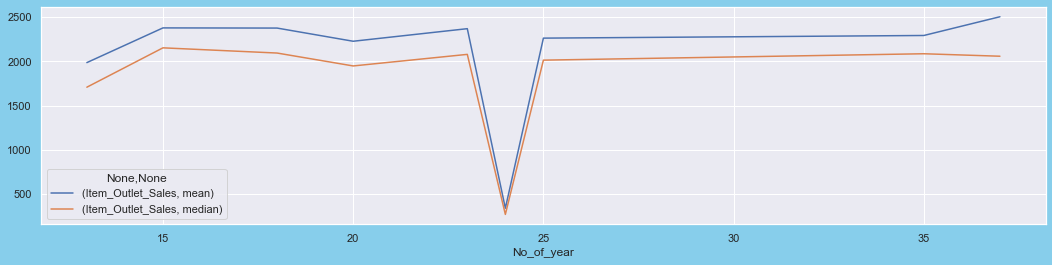

In [70]:
outletage.plot(figsize=(18,4))

#### No of outlet sales is not affecting by the no of years

#### => more fat item or less fat item is mostly sold?

In [71]:
groupby_bi_num("Item_Fat_Content","Item_Outlet_Sales")

Item_Outlet_Sales             
                              mean       median
Item_Fat_Content                               
Low Fat                2174.734527  1876.205882
Regular                2202.843551  1897.387163

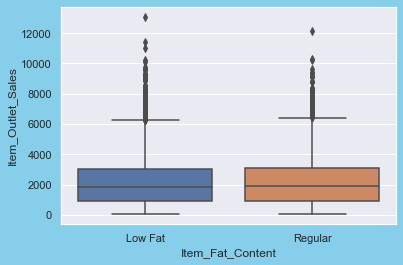

In [75]:
sb.boxplot(x=final_data["Item_Fat_Content"],y=final_data["Item_Outlet_Sales"]);

#### sales value made few  more in regular food than low fat food

### => How much sales is made by each item type

In [76]:
groupby_bi_num("Item_Type","Item_Outlet_Sales")

Item_Outlet_Sales             
                                   mean       median
Item_Type                                           
Baking Goods                1979.969501  1680.146300
Breads                      2158.528431  1860.245200
Breakfast                   2059.448363  1730.019577
Canned                      2173.387634  1860.911000
Dairy                       2249.042114  1754.340410
Frozen Foods                2101.816679  1696.284181
Fruits and Vegetables       2253.002842  1911.511800
Hard Drinks                 2120.725230  1715.475821
Health and Hygiene          2054.531365  1837.750772
Household                   2270.956923  2069.306400
Meat                        2159.841847  1896.792781
Others                      2032.062347  1824.292000
Seafood                     2339.941894  2182.101433
Snack Foods                 2286.003692  2050.664000
Soft Drinks                 2135.722763  1770.487469
Starchy Foods               2402.242581  2114.364302

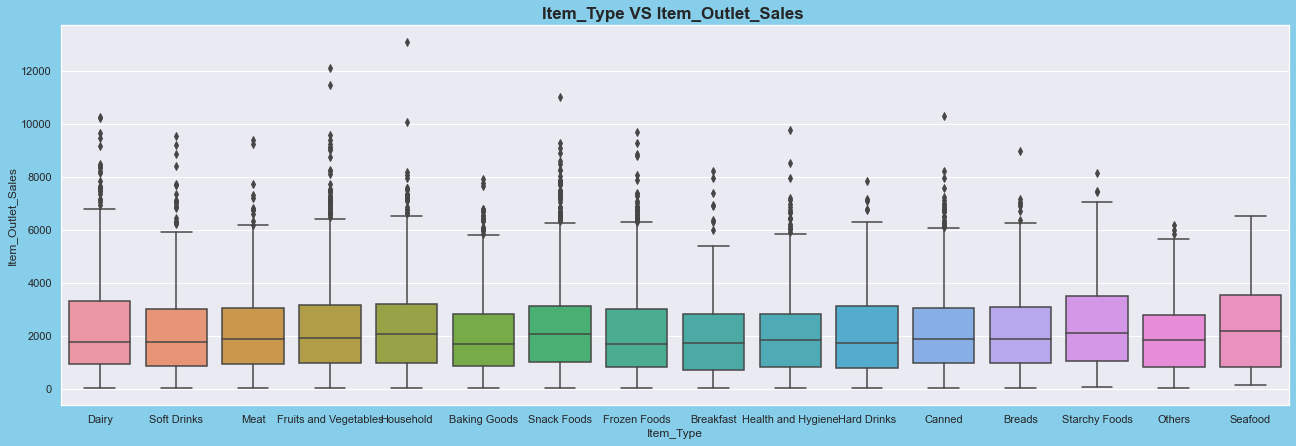

In [77]:
plt.figure(figsize=(22,7))
sb.boxplot(x=final_data["Item_Type"],y=final_data["Item_Outlet_Sales"])
plt.title("Item_Type VS Item_Outlet_Sales ",fontweight="bold",fontsize=17);

#### sales value made more in strachy food

#### Which type of outlet made more sales?

In [78]:
groupby_bi_num("Outlet_Type","Item_Outlet_Sales")

Item_Outlet_Sales             
                               mean       median
Outlet_Type                                     
Grocery Store            342.957018   284.962400
Supermarket Type1       2317.452688  2063.319592
Supermarket Type2       1985.839101  1708.082832
Supermarket Type3       3722.551932  3437.454716

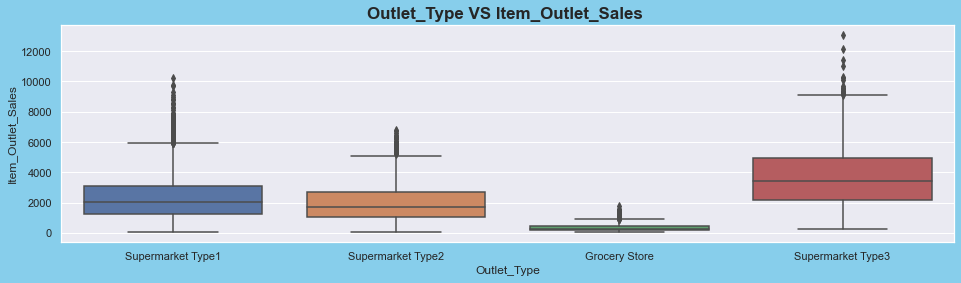

In [79]:
plt.figure(figsize=(16,4))
sb.boxplot(x=final_data["Outlet_Type"],y=final_data["Item_Outlet_Sales"])
plt.title("Outlet_Type VS Item_Outlet_Sales ",fontweight="bold",fontsize=17);

#### Item sold more in supermarkert type 3

In [80]:
data=final_data.copy()

In [81]:
data.columns
data.shape

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'No_of_item_sell', 'No_of_year'],
      dtype='object')

(14204, 14)

In [82]:
def pie(col,col_wise,width=5,height=5):
    unique_item=data[col_wise].unique()
    for i in unique_item:
        h=data[data[col_wise]==i]
        g=h[col].value_counts()
        plt.figure(figsize=(width,height))
        plt.pie(g,labels=g.index,autopct='%.2f%%')
        plt.title(i,fontweight="bold",fontsize=17)
        
        plt.show()

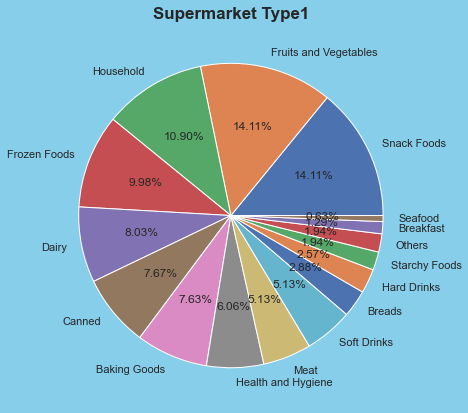

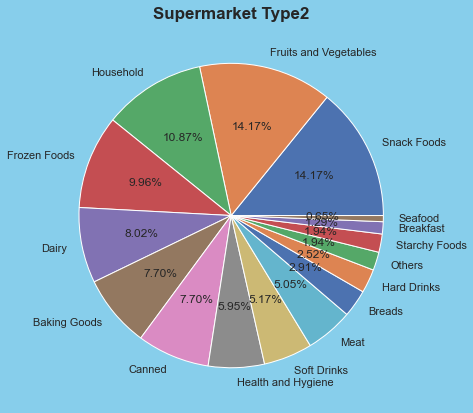

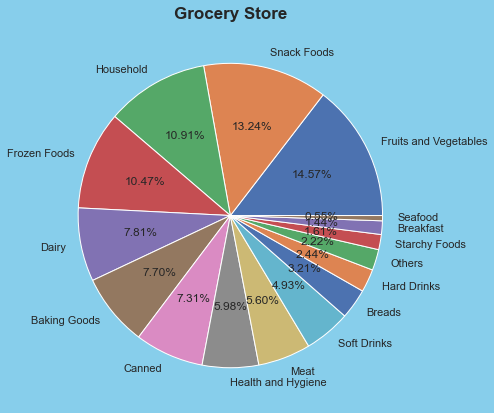

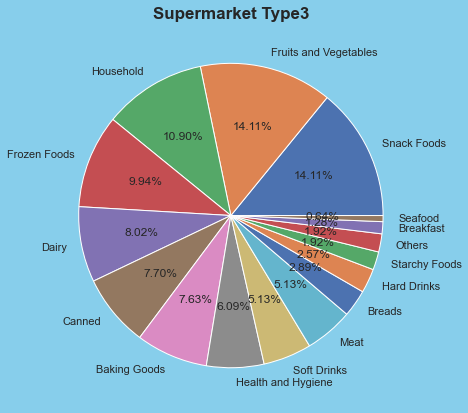

In [83]:
pie("Item_Type","Outlet_Type",10,7)

### most of the time people come in the shop to buy fruit and vegetables and snack food

In [84]:
data.groupby(['Item_Type'])[['No_of_item_sell']].sum().sort_values(by='No_of_item_sell',ascending=False)

No_of_item_sell
Item_Type                             
Snack Foods               31353.955499
Fruits and Vegetables     31252.170478
Household                 23826.437736
Frozen Foods              21799.134147
Dairy                     17415.304046
Baking Goods              17091.684719
Canned                    17084.470534
Health and Hygiene        13309.306022
Soft Drinks               11476.420197
Meat                      11367.946651
Breads                     6507.108295
Hard Drinks                5601.873405
Starchy Foods              4351.429670
Others                     4254.660177
Breakfast                  2748.124546
Seafood                    1470.116464

In [85]:
def barplot_bi(col1,col2):
    plt.figure(figsize=(17,5))
    sb.barplot(x=data[col1],y=data[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(col1+" VS "+col2,fontsize=15,fontweight="bold")
    plt.show()
    


In [86]:
def countplot_bi(col1,col2):
    plt.figure(figsize=(17,5))
    sb.countplot(data[col1],hue=data[col2])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(col1+" VS "+col2,fontsize=15,fontweight="bold")
    plt.show()

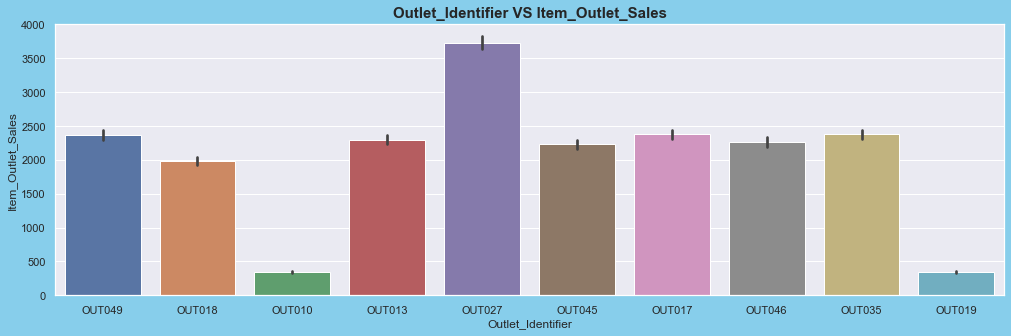

In [87]:
barplot_bi('Outlet_Identifier','Item_Outlet_Sales')
##sb.barplot(y=data['Item_Outlet_Sales'],x=data['Outlet_Identifier'])

### sales value made more in OUT027 outlet

In [88]:
data.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales', 'Item_Identifier',
       'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type', 'No_of_item_sell', 'No_of_year'],
      dtype='object')

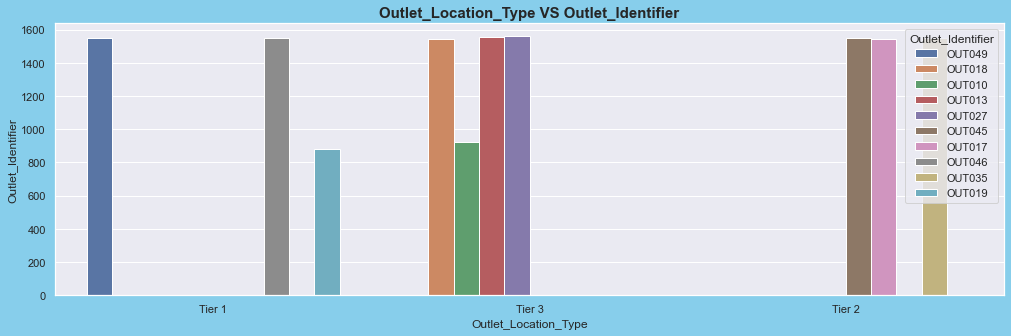

In [89]:
countplot_bi('Outlet_Location_Type','Outlet_Identifier')
##sb.countplot(data['Outlet_Location_Type'],hue=data['Outlet_Identifier'])

### IN tier3 location outlier numbers are more

In [90]:
def boxplot_bi(col1,col2,w=15,l=5):
    plt.figure(figsize=(w,l))
    sb.boxplot(x=data[col1],y=data[col2])
    plt.show()

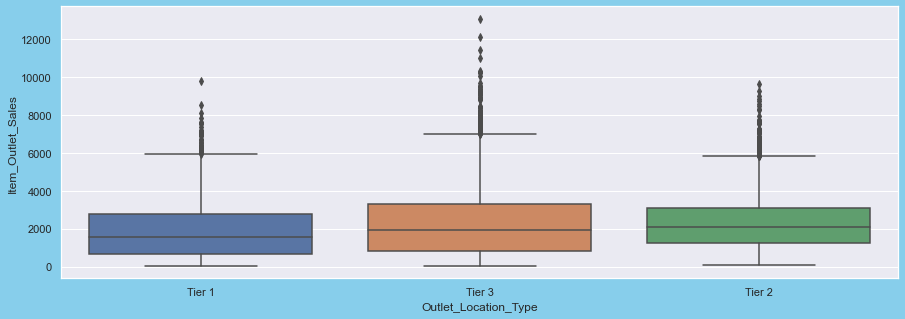

In [91]:
boxplot_bi('Outlet_Location_Type','Item_Outlet_Sales')

### in tier3 sales are more

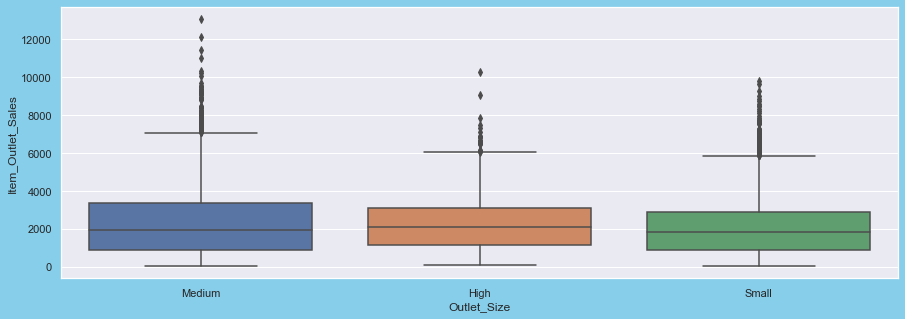

In [92]:
boxplot_bi('Outlet_Size','Item_Outlet_Sales')

#### in Medium size outliers sells are more

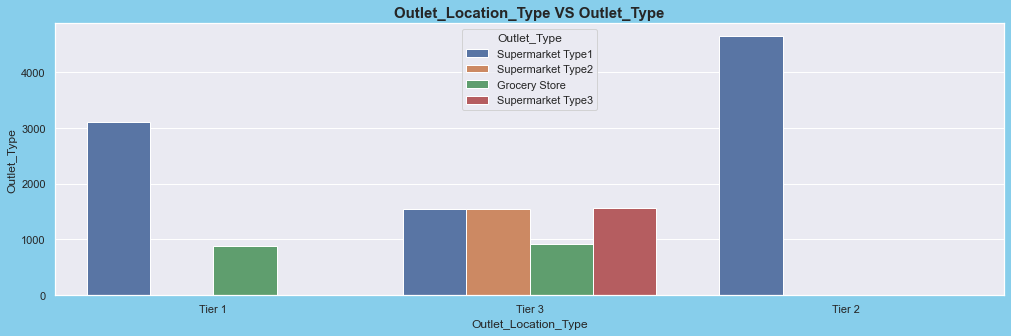

In [93]:
countplot_bi('Outlet_Location_Type',"Outlet_Type")

- in tier2 all the outlier is supermarket type 1
- all type of market in located in tier3


In [97]:
def scatter_bi(col1,col2,w=16,l=4):
    plt.figure(figsize=(w,l))  
    sb.scatterplot(x=data[col1],y=data[col2],legend='auto')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(col1+" VS "+col2,fontsize=15,fontweight="bold")
    plt.show()
    

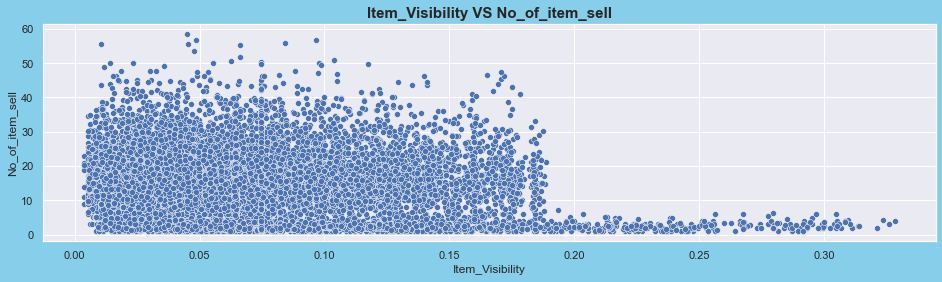

In [98]:
scatter_bi('Item_Visibility','No_of_item_sell')

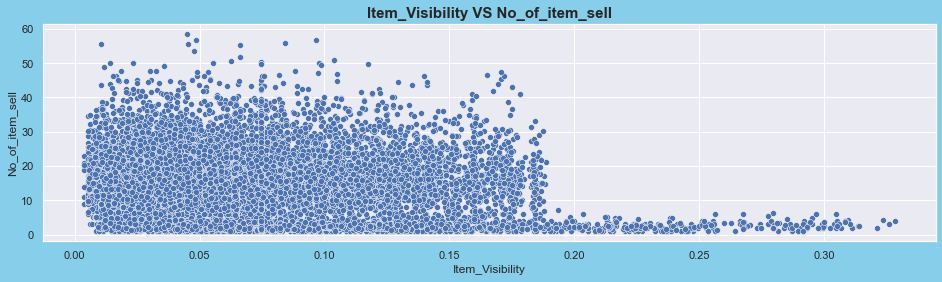

In [99]:
scatter_bi('Item_Visibility','No_of_item_sell')

#### Item visibility is not matter for sales growth

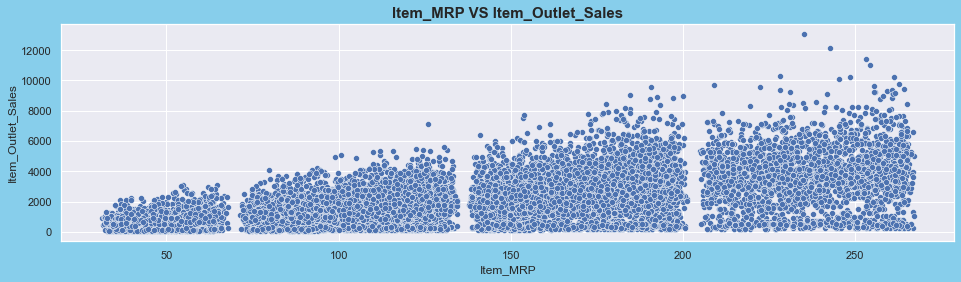

In [100]:
scatter_bi('Item_MRP','Item_Outlet_Sales')

#### if item value is more the sales value is more

In [101]:
def hist_bi(col1,col2,w=16,l=4):
    plt.figure(figsize=(w,l))  
    sb.histplot(x=data[col1],y=data[col2],legend='auto')
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(col1+" VS "+col2,fontsize=15,fontweight="bold")
    plt.show()
    

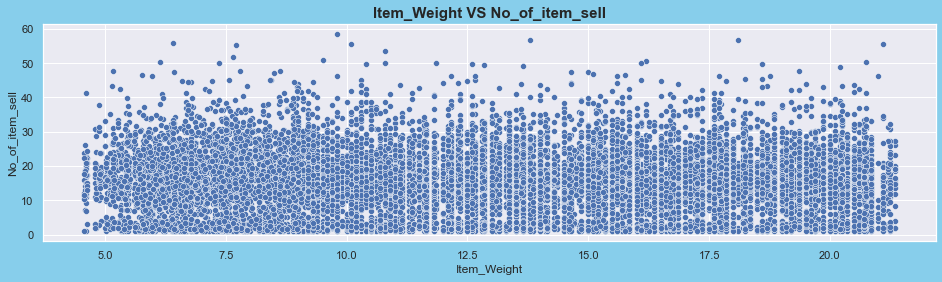

In [102]:
scatter_bi('Item_Weight','No_of_item_sell')

### item weight is not so much related with no of item sell

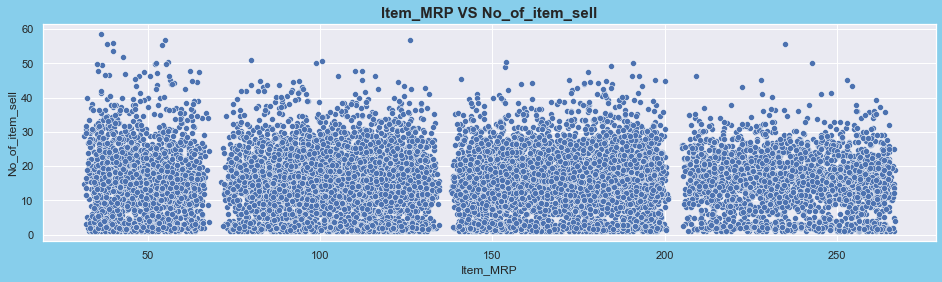

In [103]:
scatter_bi('Item_MRP','No_of_item_sell')

### MULTIVARIANT

In [104]:
def barplot_mul(col1,col2,col3,w=17,l=5):
    plt.figure(figsize=(w,l))
    sb.barplot(x=data[col1],y=data[col2],hue=data[col3])
    plt.xlabel(col1)
    plt.ylabel(col2)
    plt.title(col3+" wise "+col1+" VS "+col2,fontsize=15,fontweight="bold")
    plt.show()
    

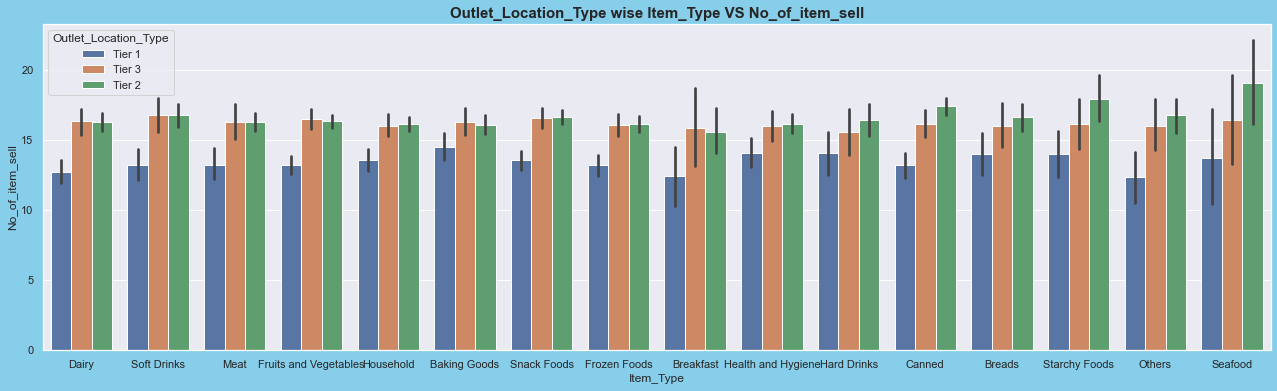

In [105]:
barplot_mul('Item_Type','No_of_item_sell','Outlet_Location_Type',22,6)

- every item type is demanded in tier3 and tier2
- for the seafood and strachy food are more demanded in tier 2 location
- in tier 1 no. of item sells less than tier2 and tier3 but, among all the food baking goods is demanded in tier1


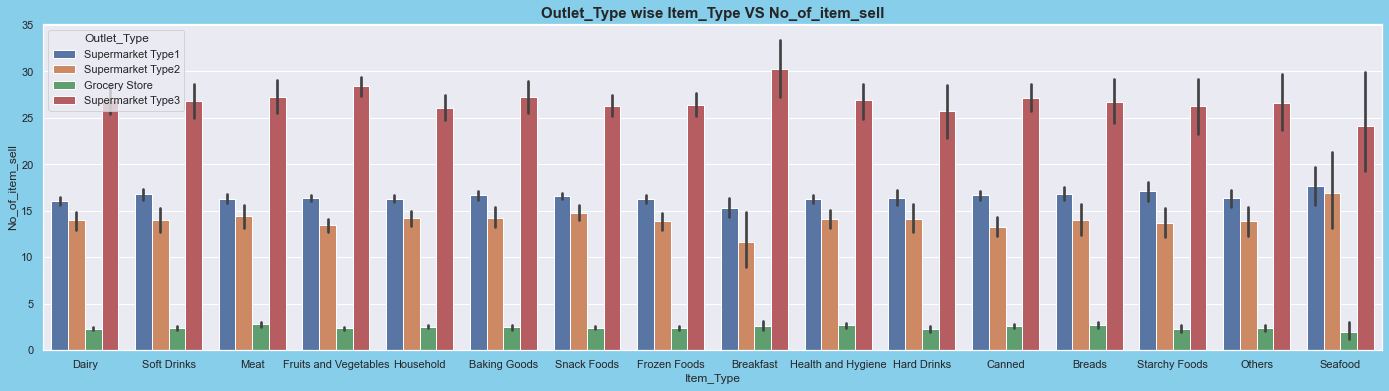

In [106]:
barplot_mul('Item_Type','No_of_item_sell','Outlet_Type',24,6)

- among all outlet type in supermarket type 3 no of sales is more 
- in supermarket in amount of buying breakfast item,fruit and vegetables are more

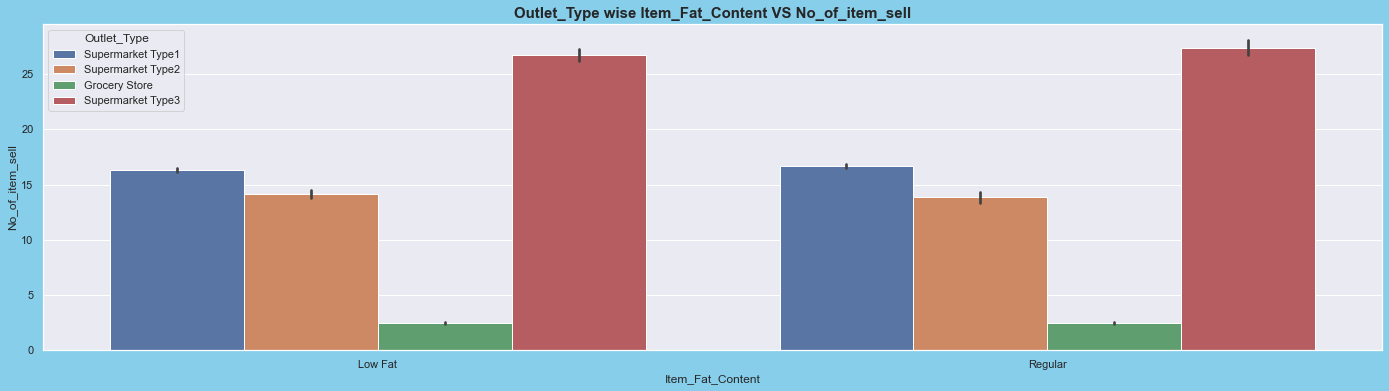

In [107]:
barplot_mul('Item_Fat_Content','No_of_item_sell','Outlet_Type',24,6)

- in supertmaket3 more item is sell
- in supermarket3 ,lowfat and regular food both are demanded,regular item is comparatively sell more than low fat fode

-------------------------------------------------------------------------------------------------------------------------------------------

In [108]:
final_data=data.copy()

In [109]:
final_data.head(2)


Item_Weight  Item_Visibility  Item_MRP  Outlet_Establishment_Year  \
0         9.30         0.016047  249.8092                     1999.0   
1         5.92         0.019278   48.2692                     2009.0   

   Item_Outlet_Sales Item_Identifier Item_Fat_Content    Item_Type  \
0          3735.1380           FDA15          Low Fat        Dairy   
1           443.4228           DRC01          Regular  Soft Drinks   

  Outlet_Identifier Outlet_Size Outlet_Location_Type        Outlet_Type  \
0            OUT049      Medium               Tier 1  Supermarket Type1   
1            OUT018      Medium               Tier 3  Supermarket Type2   

   No_of_item_sell  No_of_year  
0        14.951963        23.0  
1         9.186454        13.0

In [110]:
final_df=final_data.drop(['Item_Identifier','Outlet_Identifier','No_of_item_sell','Outlet_Establishment_Year','Outlet_Size'],axis=1)

In [111]:
final_df=pd.concat([final_df,outlet_size_encode['outlet_size_encode']],axis=1)
final_df.head(2)
final_df.dtypes
final_df.isnull().sum()

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales Item_Fat_Content  \
0         9.30         0.016047  249.8092          3735.1380          Low Fat   
1         5.92         0.019278   48.2692           443.4228          Regular   

     Item_Type Outlet_Location_Type        Outlet_Type  No_of_year  \
0        Dairy               Tier 1  Supermarket Type1        23.0   
1  Soft Drinks               Tier 3  Supermarket Type2        13.0   

   outlet_size_encode  
0                 1.0  
1                 1.0

Item_Weight             float64
Item_Visibility         float64
Item_MRP                float64
Item_Outlet_Sales       float64
Item_Fat_Content         object
Item_Type                object
Outlet_Location_Type     object
Outlet_Type              object
No_of_year              float64
outlet_size_encode      float64
dtype: object

Item_Weight             0
Item_Visibility         0
Item_MRP                0
Item_Outlet_Sales       0
Item_Fat_Content        0
Item_Type               0
Outlet_Location_Type    0
Outlet_Type             0
No_of_year              0
outlet_size_encode      0
dtype: int64

In [112]:
a1=final_df.select_dtypes(exclude="object")
b1=final_df.select_dtypes(include="object")
a1.head(2)
b1.head(2)
a_lst1=list(a1.columns)
b_lst1=list(b1.columns)
print(tabulate({"categorical":b_lst1, "numeric":a_lst1},headers=["categorical","continuous"]))


Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  No_of_year  \
0         9.30         0.016047  249.8092          3735.1380        23.0   
1         5.92         0.019278   48.2692           443.4228        13.0   

   outlet_size_encode  
0                 1.0  
1                 1.0

Item_Fat_Content    Item_Type Outlet_Location_Type        Outlet_Type
0          Low Fat        Dairy               Tier 1  Supermarket Type1
1          Regular  Soft Drinks               Tier 3  Supermarket Type2

categorical           continuous
--------------------  ------------------
Item_Fat_Content      Item_Weight
Item_Type             Item_Visibility
Outlet_Location_Type  Item_MRP
Outlet_Type           Item_Outlet_Sales
                      No_of_year
                      outlet_size_encode


In [113]:
b_lst1=final_df.select_dtypes(include=object)

In [114]:
labelencoder=preprocessing.LabelEncoder()
for i in b_lst1:
    c=i+"_encode"
    final_df[c]=labelencoder.fit_transform(final_df[i])

In [115]:
final_df.head(2)
final_df.shape

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales Item_Fat_Content  \
0         9.30         0.016047  249.8092          3735.1380          Low Fat   
1         5.92         0.019278   48.2692           443.4228          Regular   

     Item_Type Outlet_Location_Type        Outlet_Type  No_of_year  \
0        Dairy               Tier 1  Supermarket Type1        23.0   
1  Soft Drinks               Tier 3  Supermarket Type2        13.0   

   outlet_size_encode  Item_Fat_Content_encode  Item_Type_encode  \
0                 1.0                        0                 4   
1                 1.0                        1                14   

   Outlet_Location_Type_encode  Outlet_Type_encode  
0                            0                   1  
1                            2                   2

(14204, 14)

In [116]:
X=final_df.select_dtypes(exclude="object")
X.head(2)
X.shape

Item_Weight  Item_Visibility  Item_MRP  Item_Outlet_Sales  No_of_year  \
0         9.30         0.016047  249.8092          3735.1380        23.0   
1         5.92         0.019278   48.2692           443.4228        13.0   

   outlet_size_encode  Item_Fat_Content_encode  Item_Type_encode  \
0                 1.0                        0                 4   
1                 1.0                        1                14   

   Outlet_Location_Type_encode  Outlet_Type_encode  
0                            0                   1  
1                            2                   2

(14204, 10)

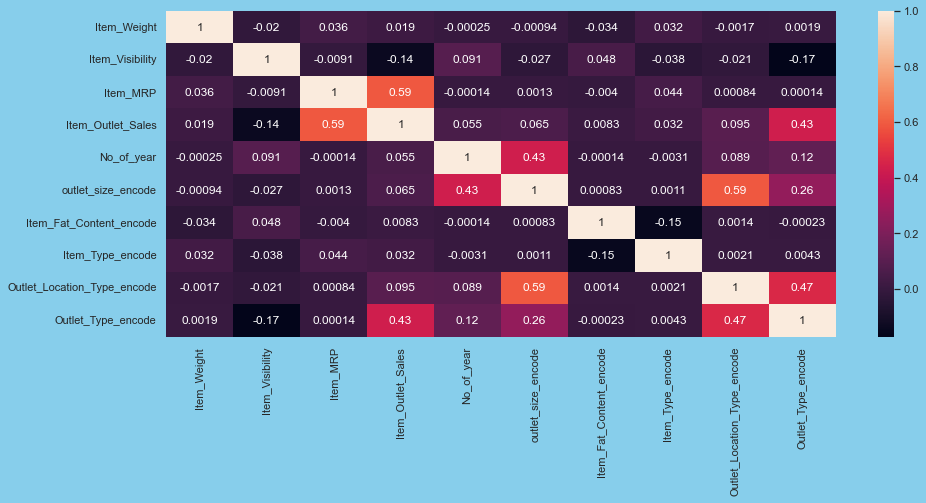

In [117]:
plt.figure(figsize=(15,6))
corr_data=X.corr()
sb.heatmap(corr_data,annot=True);

In [118]:
x_final=X.drop(['Item_Outlet_Sales'],axis=1)
y_final=X[['Item_Outlet_Sales']]
x_final.head(2)
y_final.head(2)
x_final.shape
y_final.shape

Item_Weight  Item_Visibility  Item_MRP  No_of_year  outlet_size_encode  \
0         9.30         0.016047  249.8092        23.0                 1.0   
1         5.92         0.019278   48.2692        13.0                 1.0   

   Item_Fat_Content_encode  Item_Type_encode  Outlet_Location_Type_encode  \
0                        0                 4                            0   
1                        1                14                            2   

   Outlet_Type_encode  
0                   1  
1                   2

Item_Outlet_Sales
0          3735.1380
1           443.4228

(14204, 9)

(14204, 1)

In [119]:
x_train_,x_test_,y_train_,y_test_=train_test_split(x_final,y_final,train_size=0.7,random_state=92)

In [120]:
### normalized the data
scalar=MinMaxScaler()
data_scaled=pd.DataFrame(scalar.fit_transform(X),columns=X.columns)

In [121]:
x_final_scaled=data_scaled.drop(['Item_Outlet_Sales'],axis=1)
y_final_scaled=data_scaled[['Item_Outlet_Sales']]
x_final_scaled.head(2)
y_final_scaled.head(2)
x_final_scaled.shape
y_final_scaled.shape

Item_Weight  Item_Visibility  Item_MRP  No_of_year  outlet_size_encode  \
0     0.282525         0.038399  0.927507    0.416667                 0.5   
1     0.081274         0.048346  0.072068    0.000000                 0.5   

   Item_Fat_Content_encode  Item_Type_encode  Outlet_Location_Type_encode  \
0                      0.0          0.266667                          0.0   
1                      1.0          0.933333                          1.0   

   Outlet_Type_encode  
0            0.333333  
1            0.666667

Item_Outlet_Sales
0           0.283587
1           0.031419

(14204, 9)

(14204, 1)

In [122]:
x_train_scaled,x_test_scaled,y_train_scaled,y_test_scaled=train_test_split(x_final_scaled,y_final_scaled,train_size=0.7,random_state=92)

### Gridsearch cv to finding the best parameter for decision tree regreesor

In [123]:
dtm=DecisionTreeRegressor(random_state=92)

In [124]:
 params = {
 'max_depth': list(range(2,20)),
 'min_samples_split': list(range(5,200)),
}

In [125]:
grid_search=GridSearchCV(dtm,param_grid=params,verbose=1,scoring='r2',return_train_score=True)

In [126]:
grid_search.fit(x_train_,y_train_)

Fitting 5 folds for each of 3510 candidates, totalling 17550 fits


GridSearchCV(estimator=DecisionTreeRegressor(random_state=92),
             param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                       14, 15, 16, 17, 18, 19],
                         'min_samples_split': [5, 6, 7, 8, 9, 10, 11, 12, 13,
                                               14, 15, 16, 17, 18, 19, 20, 21,
                                               22, 23, 24, 25, 26, 27, 28, 29,
                                               30, 31, 32, 33, 34, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [127]:
grid_search.best_params_

{'max_depth': 7, 'min_samples_split': 99}

In [128]:
grid_search.best_score_

0.6604167800024486

In [129]:
dtm_best=grid_search.best_estimator_
dtm_best.feature_importances_

array([4.47539595e-03, 3.19972346e-03, 5.32051605e-01, 3.45154917e-02,
       1.71129145e-05, 1.74013640e-03, 1.59479991e-03, 1.25252606e-03,
       4.21153208e-01])

In [130]:
imp_df = pd.DataFrame({
 "Varname": x_train_.columns,
 "Imp": dtm_best.feature_importances_
})

In [131]:
imp_df.sort_values(by="Imp", ascending=False)

Varname       Imp
2                     Item_MRP  0.532052
8           Outlet_Type_encode  0.421153
3                   No_of_year  0.034515
0                  Item_Weight  0.004475
1              Item_Visibility  0.003200
5      Item_Fat_Content_encode  0.001740
6             Item_Type_encode  0.001595
7  Outlet_Location_Type_encode  0.001253
4           outlet_size_encode  0.000017

In [147]:
modified_x_train_=x_train_[["Item_MRP","Outlet_Type_encode","No_of_year","Item_Visibility","Item_Type_encode","Item_Fat_Content_encode"]]
modified_x_train_.shape

(9942, 6)

In [148]:
modified_x_test_=x_test_[["Item_MRP","Outlet_Type_encode","No_of_year","Item_Visibility","Item_Type_encode","Item_Fat_Content_encode"]]
modified_x_test_.shape

(4262, 6)

## Decision Tree Regression

In [134]:
dtm = DecisionTreeRegressor(random_state=92,min_samples_split=99,max_depth=7)
dtm.fit(x_train_,y_train_)

DecisionTreeRegressor(max_depth=7, min_samples_split=99, random_state=92)

In [135]:
y_predict_dtm=dtm.predict(x_test_)
y_predict_dtm

array([4274.15604443,  698.59044917, 5504.56843791, ...,  871.33513168,
       1520.19411991, 2376.20958235])

In [136]:
r2_score_train_dtm=dtm.score(x_train_,y_train_)
r2_score_train_dtm

0.6822924057561814

In [137]:
r2_score_test_dtm=dtm.score(x_test_,y_test_)
r2_score_test_dtm

0.6524424506701083

In [138]:
mse=mean_squared_error(y_test_,y_predict_dtm)
rmse=mean_squared_error(y_test_,y_predict_dtm,squared=False)
mae=mean_absolute_error(y_test_,y_predict_dtm)
mse
rmse
mae

918147.4821355393

958.2001263491564

654.1580012255429

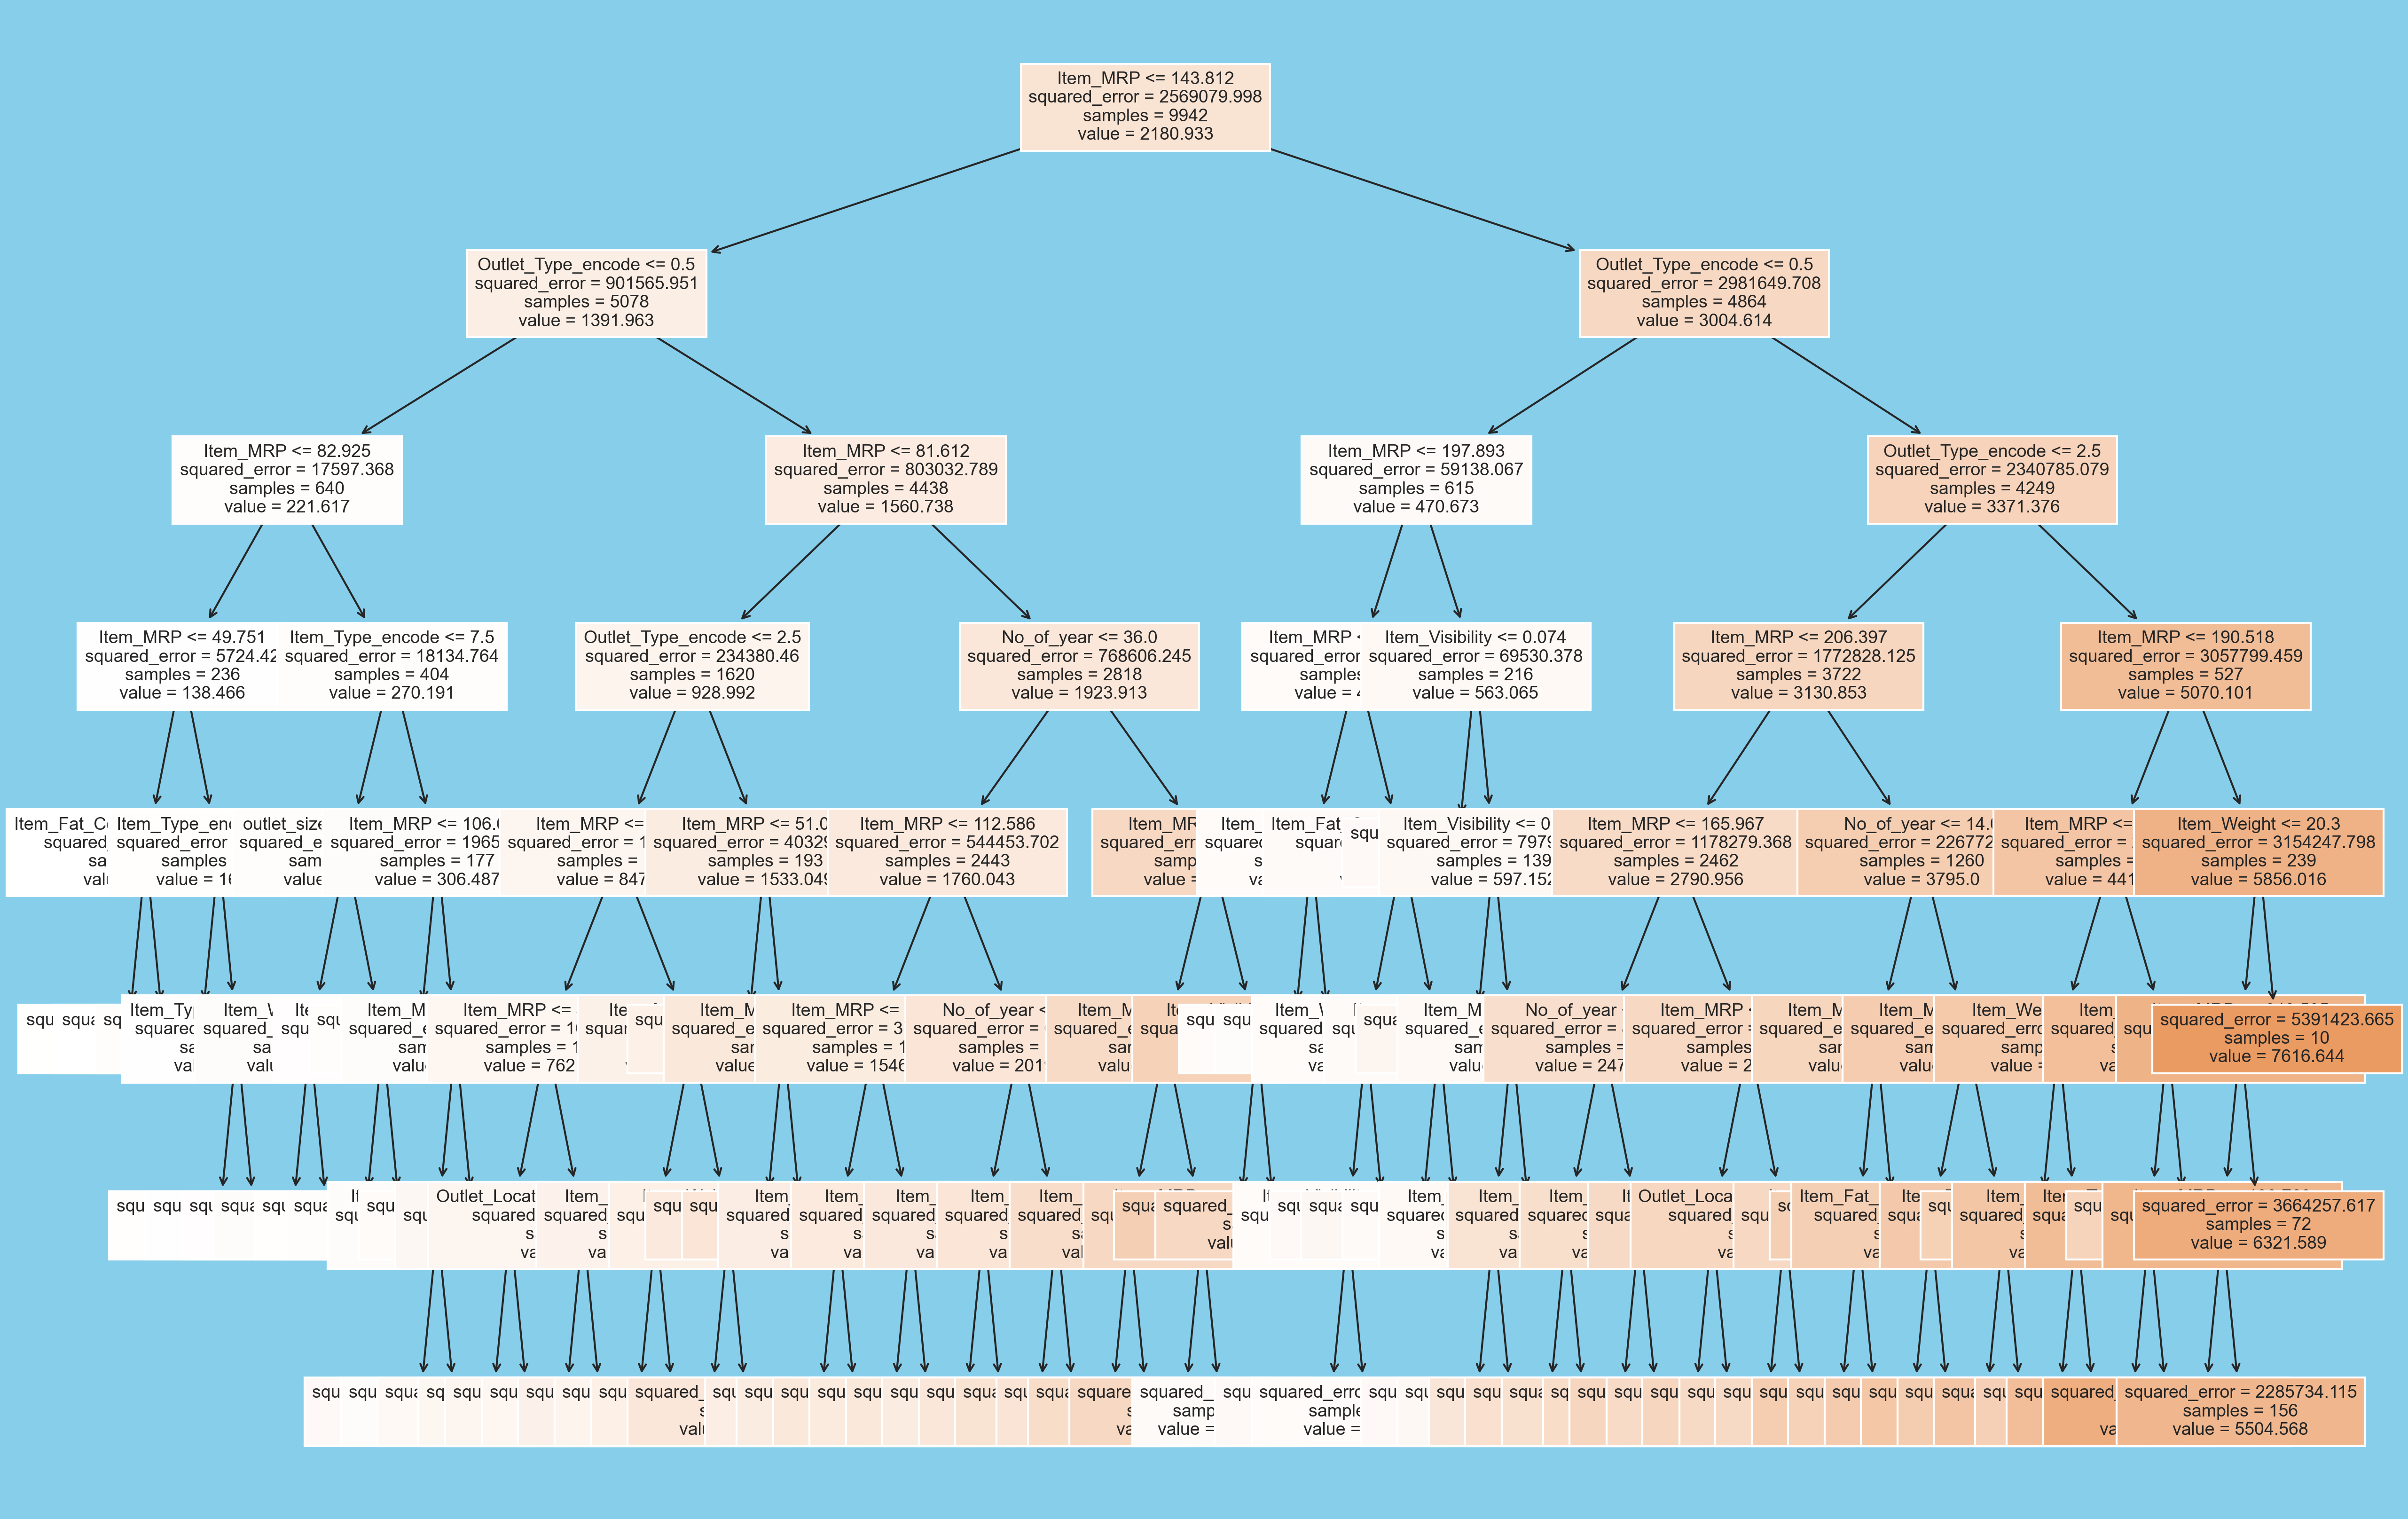

In [139]:
fig,axes= plt.subplots(nrows=1,ncols=1,figsize=(20,14),dpi=300)
tree.plot_tree(dtm,feature_names=x_final.columns,filled=True,fontsize=9)
plt.show();

----------------------------------------------------------------------------------------------------------------------------

### Gridsearch cv to finding the best parameter for Random Forest regreesor

In [149]:
rfr=RandomForestRegressor(n_jobs=-1)

In [150]:
params2={'max_depth':[2,3,5,6,8,10,15,18],'min_samples_split': [5,10,20,30,40,50,70,80,100],'n_estimators':[10,15,25,30,50,70,80,90.100]}

In [151]:
grid_search2=GridSearchCV(rfr,param_grid=params2,cv=4,n_jobs=-1,verbose=1,scoring='r2')

In [152]:
grid_search2.fit(modified_x_train_,y_train_)

Fitting 4 folds for each of 576 candidates, totalling 2304 fits


GridSearchCV(cv=4, estimator=RandomForestRegressor(n_jobs=-1), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 6, 8, 10, 15, 18],
                         'min_samples_split': [5, 10, 20, 30, 40, 50, 70, 80,
                                               100],
                         'n_estimators': [10, 15, 25, 30, 50, 70, 80, 90.1]},
             scoring='r2', verbose=1)

In [153]:
grid_search2.best_params_

{'max_depth': 8, 'min_samples_split': 80, 'n_estimators': 30}

In [154]:
grid_search2.best_score_

0.6644836829905431

In [155]:
rtr1=RandomForestRegressor(n_estimators=30,n_jobs=-1,max_depth=8,min_samples_split=80)
rtr1.fit(modified_x_train_,y_train_)
y_predict_rtr1=rtr1.predict(modified_x_test_)
y_predict_rtr1
rtr1.score(modified_x_train_,y_train_)
rtr1.fit(modified_x_test_,y_test_)
rtr1.score(modified_x_test_,y_test_)

RandomForestRegressor(max_depth=8, min_samples_split=80, n_estimators=30,
                      n_jobs=-1)

array([4240.42392547,  679.39553434, 5335.60740753, ...,  765.9603548 ,
       1548.75725587, 2632.7159946 ])

0.6899735369220026

RandomForestRegressor(max_depth=8, min_samples_split=80, n_estimators=30,
                      n_jobs=-1)

0.6956629615473857

In [156]:
mse=mean_squared_error(y_test_,y_predict_rtr1)
rmse=mean_squared_error(y_test_,y_predict_rtr1,squared=False)
mae=mean_absolute_error(y_test_,y_predict_rtr1)
mse
rmse
mae

884268.018844853

940.3552620392215

643.0327211260476

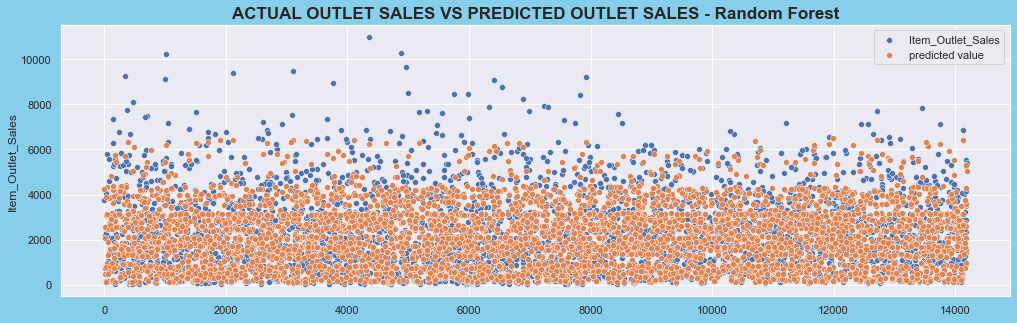

In [157]:
plt.figure(figsize=(17,5))
sb.scatterplot(y_test_.index, y_test_["Item_Outlet_Sales"],label="Item_Outlet_Sales")
sb.scatterplot(y_test_.index,y_predict_rtr1,label="predicted value")
##plt.xlim([2000,3000])
plt.title("ACTUAL OUTLET SALES VS PREDICTED OUTLET SALES - Random Forest",fontweight="bold",fontsize=17)
plt.legend();

-------------------------------------------------------------------------------------------------------------------------------------------------

## Stacking with the normalized data

In [158]:
def get_stacking():
    weak_learners=[]
    weak_learners.append(("knn",KNeighborsRegressor()))
    weak_learners.append(("decisiontree",DecisionTreeRegressor()))
    weak_learners.append(("Randomforest",RandomForestRegressor()))
    meta_model=LinearRegression()
    stack_model=StackingRegressor(estimators=weak_learners,final_estimator=meta_model,cv=4)
    return stack_model

In [160]:
model_stacking_norm=get_stacking()

In [161]:
model_stacking_norm.fit(x_train_scaled,y_train_scaled)

StackingRegressor(cv=4,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('decisiontree', DecisionTreeRegressor()),
                              ('Randomforest', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [162]:
y_predict_stacking_norm=model_stacking_norm.predict(x_test_scaled)

In [163]:
y_predict_stacking_norm

array([0.30254113, 0.04718318, 0.39572892, ..., 0.07201577, 0.11120846,
       0.18059947])

In [164]:
model_stacking_norm.score(x_train_scaled,y_train_scaled)

0.8907947199411222

In [165]:
model_stacking_norm.score(x_test_scaled,y_test_scaled)

0.6920517696894102

In [166]:
mse1=mean_squared_error(y_test_scaled,y_predict_stacking_norm)
rmse1=mean_squared_error(y_test_scaled,y_predict_stacking_norm,squared=False)
mae1=mean_absolute_error(y_test_scaled,y_predict_stacking_norm)
mse1
rmse1
mae1

0.004774169739187312

0.06909536698786187

0.045921078591831165

### Stacking with non normalized data

In [167]:
def get_stacking1():
    weak_learners=[]
    weak_learners.append(("knn",KNeighborsRegressor()))
    weak_learners.append(("decisiontree",DecisionTreeRegressor()))
    weak_learners.append(("Randomforest",RandomForestRegressor()))
    meta_model=LinearRegression()
    stack_model1=StackingRegressor(estimators=weak_learners,final_estimator=meta_model,cv=4)
    return stack_model1

In [168]:
model_stacking1=get_stacking1()

In [169]:
model_stacking1.fit(x_train_,y_train_)

StackingRegressor(cv=4,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('decisiontree', DecisionTreeRegressor()),
                              ('Randomforest', RandomForestRegressor())],
                  final_estimator=LinearRegression())

In [170]:
y_predict_stacking1=model_stacking1.predict(x_test_)
y_predict_stacking1

array([3562.82019753,  717.51652734, 4982.38155988, ...,  954.15479179,
       1346.7352781 , 2632.51510477])

In [171]:
model_stacking1.score(x_train_,y_train_)

0.9389112374827414

In [172]:
model_stacking1.score(x_test_,y_test_)

0.6554272914093737

In [173]:
mse2=mean_squared_error(y_test_,y_predict_stacking1)
rmse2=mean_squared_error(y_test_,y_predict_stacking1,squared=False)
mae2=mean_absolute_error(y_test_,y_predict_stacking1)
mse2
rmse2
mae2

910262.3879558386

954.0767201623979

651.8650380173423

--------------------------------------------------------------------------------------------------------------

#### Denormalized the data

In [174]:
scalar=MinMaxScaler()

In [175]:
obj=scalar.fit(y_train_)

In [176]:
scaled_backed=obj.inverse_transform(pd.DataFrame(y_predict_stacking_norm))

In [177]:
scaled_backed

array([[3982.56358444],
       [ 649.20382901],
       [5199.00663509],
       ...,
       [ 973.36050194],
       [1484.96913181],
       [2390.77676992]])

In [178]:
real_predictedsales1=pd.concat([y_test_,pd.DataFrame(scaled_backed,index=y_test_.index,columns=["predicted value"])],axis=1)
real_predictedsales1

Item_Outlet_Sales  predicted value
6155         4996.829000      3982.563584
9306          575.701443       649.203829
10790        6056.458870      5199.006635
1203         2631.241600      1475.569062
10796        5051.040448      5373.558295
...                  ...              ...
2695         3704.511200      2226.045613
14034        2155.042991      1839.157688
7363         1071.938000       973.360502
8151         2396.880000      1484.969132
10571        2300.366809      2390.776770

[4262 rows x 2 columns]

In [179]:
real_predictedsales=pd.concat([y_test_,pd.DataFrame(y_predict_stacking1,index=y_test_.index,columns=["predicted value"])],axis=1)
real_predictedsales

Item_Outlet_Sales  predicted value
6155         4996.829000      3562.820198
9306          575.701443       717.516527
10790        6056.458870      4982.381560
1203         2631.241600      2022.989229
10796        5051.040448      5245.187139
...                  ...              ...
2695         3704.511200      2223.184927
14034        2155.042991      1482.443318
7363         1071.938000       954.154792
8151         2396.880000      1346.735278
10571        2300.366809      2632.515105

[4262 rows x 2 columns]

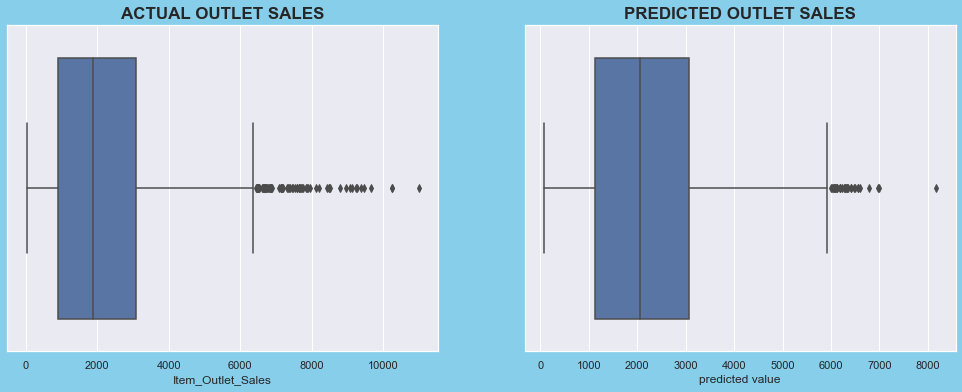

In [184]:
fig,ax=plt.subplots(1,2,figsize=(17,6))

plt.subplot(1,2,1)
sb.boxplot(real_predictedsales1["Item_Outlet_Sales"],ax=ax[0])
plt.title("ACTUAL OUTLET SALES",fontweight="bold",fontsize=17)
plt.subplot(1,2,2)
sb.boxplot(real_predictedsales1["predicted value"],ax=ax[1])
plt.title("PREDICTED OUTLET SALES",fontweight="bold",fontsize=17)
plt.show();

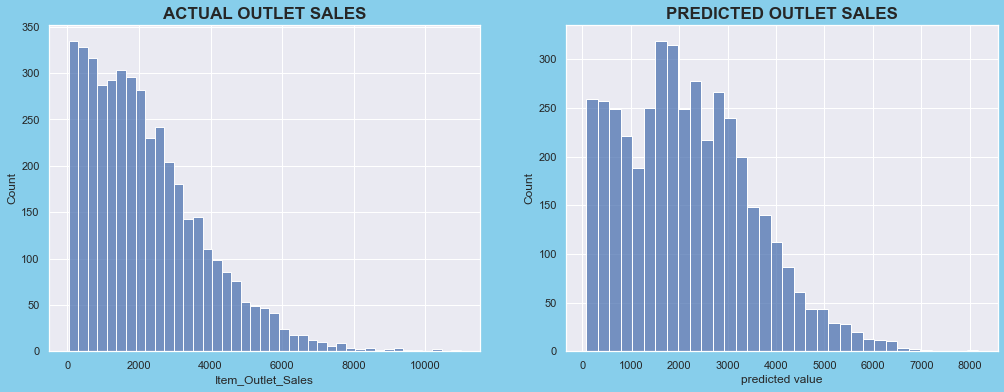

In [185]:
fig,ax=plt.subplots(1,2,figsize=(17,6))

plt.subplot(1,2,1)
sb.histplot(real_predictedsales1["Item_Outlet_Sales"],ax=ax[0])
plt.title("ACTUAL OUTLET SALES",fontweight="bold",fontsize=17)
plt.subplot(1,2,2)
sb.histplot(real_predictedsales1["predicted value"],ax=ax[1])
plt.title("PREDICTED OUTLET SALES",fontweight="bold",fontsize=17)
plt.show();

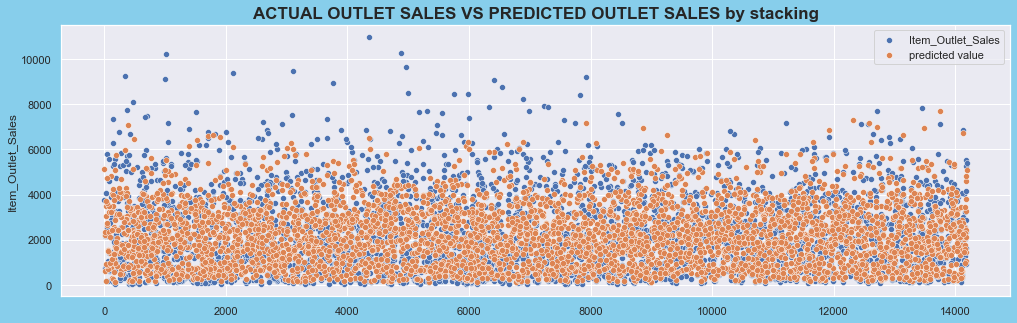

In [186]:
plt.figure(figsize=(17,5))
sb.scatterplot(y_test_.index, real_predictedsales["Item_Outlet_Sales"],label="Item_Outlet_Sales")
sb.scatterplot(y_test_.index,real_predictedsales["predicted value"],label="predicted value")
plt.title("ACTUAL OUTLET SALES VS PREDICTED OUTLET SALES by stacking",fontweight="bold",fontsize=17)
plt.legend();

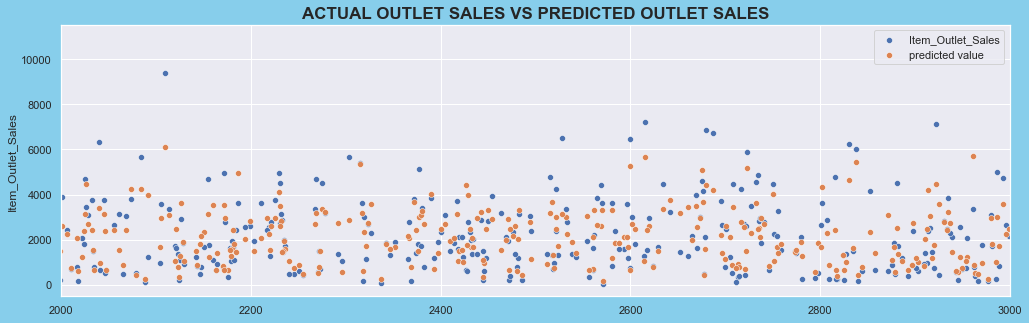

In [183]:
plt.figure(figsize=(17,5))
sb.scatterplot(y_test_.index, real_predictedsales["Item_Outlet_Sales"],label="Item_Outlet_Sales")
sb.scatterplot(y_test_.index,real_predictedsales["predicted value"],label="predicted value")
plt.xlim([2000,3000])
plt.title("ACTUAL OUTLET SALES VS PREDICTED OUTLET SALES",fontweight="bold",fontsize=17)
plt.legend();

-------------------------------------------------------------------------------------------------------------------------------------------

## Evaluation

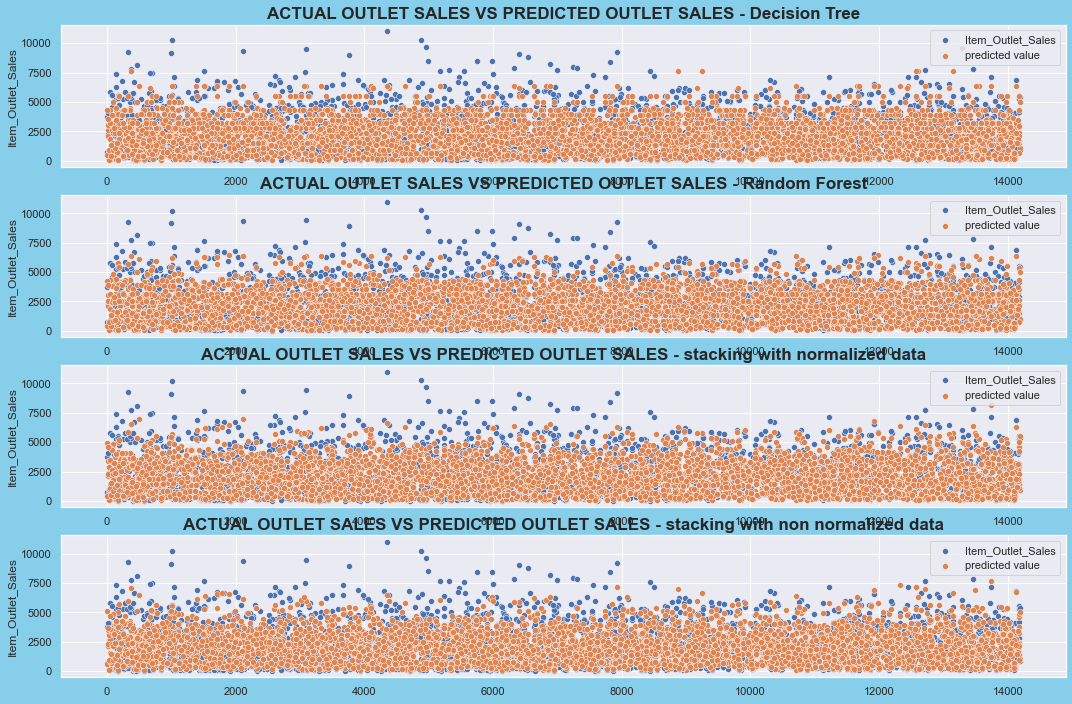

In [187]:
plt.figure(figsize=(18,12))
plt.subplot(411)
sb.scatterplot(y_test_.index, y_test_["Item_Outlet_Sales"],label="Item_Outlet_Sales")
sb.scatterplot(y_test_.index,y_predict_dtm,label="predicted value")
plt.title("ACTUAL OUTLET SALES VS PREDICTED OUTLET SALES - Decision Tree",fontweight="bold",fontsize=17)
plt.legend()
plt.subplot(412)
sb.scatterplot(y_test_.index, y_test_["Item_Outlet_Sales"],label="Item_Outlet_Sales")
sb.scatterplot(y_test_.index,y_predict_rtr1,label="predicted value")
plt.title("ACTUAL OUTLET SALES VS PREDICTED OUTLET SALES - Random Forest",fontweight="bold",fontsize=17)
plt.legend()

plt.subplot(413)
sb.scatterplot(y_test_.index, real_predictedsales1["Item_Outlet_Sales"],label="Item_Outlet_Sales")
sb.scatterplot(y_test_.index,real_predictedsales1["predicted value"],label="predicted value")
plt.title("ACTUAL OUTLET SALES VS PREDICTED OUTLET SALES - stacking with normalized data",fontweight="bold",fontsize=17)
plt.legend()

plt.subplot(414)
sb.scatterplot(y_test_.index, real_predictedsales["Item_Outlet_Sales"],label="Item_Outlet_Sales")
sb.scatterplot(y_test_.index,real_predictedsales["predicted value"],label="predicted value")
plt.title("ACTUAL OUTLET SALES VS PREDICTED OUTLET SALES - stacking with non normalized data",fontweight="bold",fontsize=17)
plt.legend();

In [191]:
dic={"r2_train":[0.6822,0.689973,0.89079,0.9389],"r2_test":[0.65244,0.69566,0.69205,0.6554],"MSE":[859134.17,85849615,0.0046,875359.788],"RMSE":[926.89,921,0.0680,935.60],"MAE":[630.36,622,0.444,631.89]}

In [192]:
evaluation=pd.DataFrame(dic,index=["Desicion Tree Regressor","Random Forest Regression","Stacking with normalized data","stacking with non-normalized data"])

In [193]:
evaluation

r2_train  r2_test           MSE     RMSE  \
Desicion Tree Regressor            0.682200  0.65244  8.591342e+05  926.890   
Random Forest Regression           0.689973  0.69566  8.584962e+07  921.000   
Stacking with normalized data      0.890790  0.69205  4.600000e-03    0.068   
stacking with non-normalized data  0.938900  0.65540  8.753598e+05  935.600   

                                       MAE  
Desicion Tree Regressor            630.360  
Random Forest Regression           622.000  
Stacking with normalized data        0.444  
stacking with non-normalized data  631.890

## BY the analysis and observation of the performance table we can clearly say that stacking with non-normalized data outperform the stacking with normalized data,decision tree and random forest

-----------------------------------------------------------------------------------------------------------------------------------------------------------

## CONCLUSION:-

#### - In tier 3 location all type of outlets located,but in the tier1  grocery and supermarket type1  and in the tier 2 supermarket type 1 is located.soi n the tier 3 location competition is very high
#### - No. of supermarket type1 outlet is very high but,still supermarket type3 sales are more
#### - so  if the supermarket type3 can create on tier 1 and tier 2 it would be highly profited,as there competition also low
#### - cutomer are attracted toward the medium size outlet
#### - mostly people come to buy vegetables,fruits and snacks means mostly the regular food
#### - mostly item visibility and weights does not effect on the sales,means whatever the people's need they buy those item
#### - although regular food is demanded in all location,but if  outlet in tier2 location shuld stored more seafood and strachy food.because allover sea and strachy is less but,  in tier3 location sea and strachy food buy more than anyother location
#### -  outlet in tier1 location should  stored more bakedfood.


--------------------------------------------------------------------------------------------------------------------------------------

--------------------------------------------------------------------------------------------------------------------